In [ ]:
# from IPython.core.display import HTML
# def css_styling():
#     styles = open("styles/custom.css", "r").read()
#     return HTML(styles)
# css_styling()

import numpy as np
np.set_printoptions(linewidth=110)



<font color='red'> <center>
# Machine Learning: Unsupervised learning 




### Per què estudiar el clustering? ###

**Ús i aplicacions:**
Aquesta tasca té moltes aplicacions en diferents dominis:

+ **Segmentació del mercat**/ creació de perfils de clients per a l'anàlisi del mercat.
+ Classifica **documents** de temes similars.
+ Grup **individus** que tenen una visió política semblant.
+ Anàlisi de **xarxes socials**.
+ Agrupa **gens** que fan la mateixa funció.
+ Detecció de **duplicats**.
+ Anàlisi de dades **astronòmiques**.
+ **Compressió**

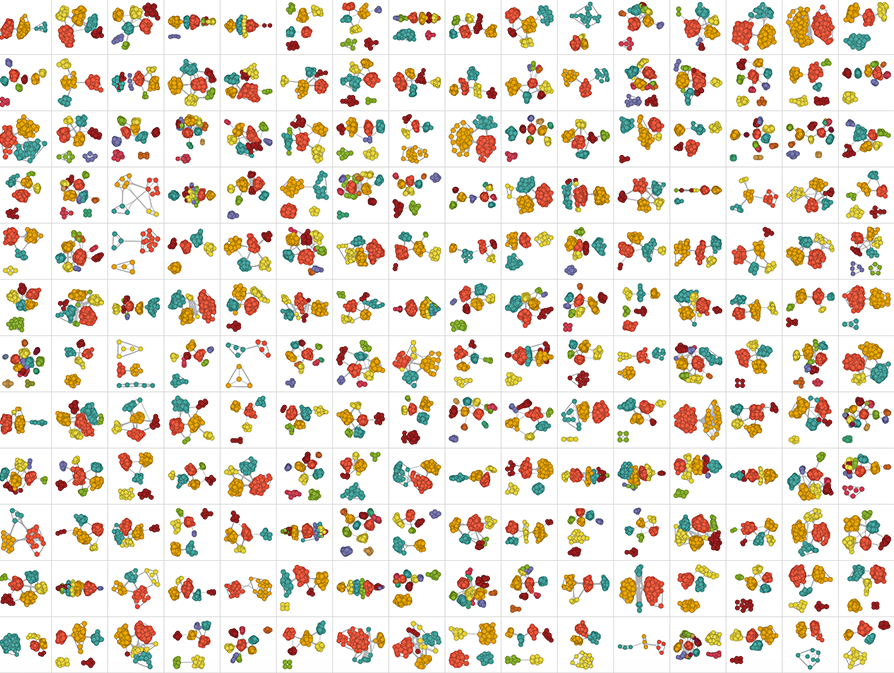

In [ ]:
# from IPython.display import HTML
# HTML('http://blog.stephenwolfram.com/2013/04/data-science-of-the-facebook-world/')

## ÍNDEX:##

1. **Introducció a l'aprenentatge no supervisat**

2. **Clustering**

  2.1 Qüestions importants en clustering

  2.2 Similitud i distància

  2.3 Avaluació de la qualitat
 
3. **Taxonomia de l'agrupació**

     3.1 Tècniques de clustering - k-means

     3.2 Agrupació jeràrquica

     3.3 Agrupació espectral

     3.4 Comparació de diferents algorismes d'agrupació en conjunts de dades de joguines
 
 
4. **Cas d'estudi: dades d'EUROSTAT**

  4.1 Aplicació de K-means al cas pràctic

  4.2 Aplicació de clustering jeràrquic

5. **Reducció de la dimensionalitat per anàlisi de components principals**

6. **Exemples**

# 1. Aprenentatge no supervisat

En l'aprenentatge automàtic, el problema de l'aprenentatge no supervisat és el d'intentar **trobar l'estructura oculta en dades sense etiquetar**. Com que els exemples que es donen a l'alumne no estan etiquetats, no hi ha **cap senyal d'error o recompensa** per avaluar una solució potencial. Això distingeix l'aprenentatge no supervisat de l'aprenentatge supervisat.

L'aprenentatge no supervisat es defineix com el conjunt d'algorismes que aprèn d'un **conjunt d'entrenament d'exemples sense etiquetar o no anotats**, utilitzant les característiques de les entrades per categoritzar-les junts segons alguns criteris **geomètrics** o **estadístics**. 

L'aprenentatge no supervisat inclou moltes tècniques que pretenen ** resumir i explicar les característiques clau** de les dades. Molts mètodes utilitzats en l'aprenentatge no supervisat es basen en mètodes de *mineria de dades* utilitzats per preprocessar dades.

Diferents *tipus* de problemes d'aprenentatge no supervisat:

+ *Clustering o Agrupament:* particionar exemples en grups quan no hi ha disponibles categories/classes predefinides
+ *Reducció de la dimensionalitat:* anàlisi de components principals, anàlisi de components independents, factorització matricial no negativa
+ *Detecció atípica:* trobar esdeveniments inusuals (per exemple, mal funcionament)
+ *Detecció de novetats:* trobar canvis a les dades


La tasca no supervisada més habitual és **agrupació**.

# 2. Clustering

**Particionar** exemples sense etiquetar en *subconjunts disjunts de clústers*, de manera que:

+ **Els exemples dins d'un clúster són similars** (*alta semblança intraclasse*)
+ **Els exemples en diferents grups són diferents** (*baixa semblança entre classes*)

Pot ajudar a descobrir noves categories de manera no supervisada (no es proporcionen etiquetes de categoria de mostra).


 ## 2.1 Preguntes importants a l'agrupació


+ Què és un *agrupament natural* entre aquests objectes?
     + Definició de "agrupació"
     + Definició de "semblança/distància"

+ *Com agrupar* mostres?

+ *Quants* clústers?
     + Fixes a priori?
     + Completament basat en dades?
     + Eviteu els grups "trivials": massa grans o petits...
     + Quins mètodes funcionen quan el nombre de mostres és gran?
     + Quins mètodes funcionen quan el nombre de classes és gran?, etc.

+ *Què* és una *bona agrupació*?
     + Quines mesures objectives es poden definir per avaluar la qualitat dels clústers?

+ A quin espai *agrupar*?
     + Què fer als espais de característiques d'alta dimensió?

<div class="alert alert-info"> 
*** IMPORTANT IDEA: Clustering és una qüestió subjectiva.
</div>

La agrupació en clústers ens ajudarà a analitzar i obtenir informació sobre les dades, però la qualitat de la partició **depèn de l'aplicació i de l'analista**

## 2.2 Similitud i distància

La noció de semblança és difícil, però podem utilitzar la noció de distància com a substitut.

La mètrica de distància més coneguda dintre d'aquest camp és la distància de Minkowski:

$$d(a,b) = \big(\sum\limits_{i=1}^d |a_i-b_i|^p \big)^{1/p}$$

Les instanciacions més conegudes d'aquesta mètrica són:

+ $p = 2$ tenim la distància euclidiana,
+ $p=1$ distància de Manhattan, i
+ $p=\infty$ distància màxima.

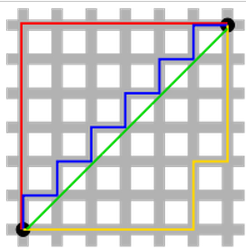

**Tingueu en compte** que el camí amb la norma L2 ($p=2$) mínima és únic , però no és cert per a la norma L1 ($p=1$)!


# 3 Tècniques d'agrupament: com agrupar mostres?

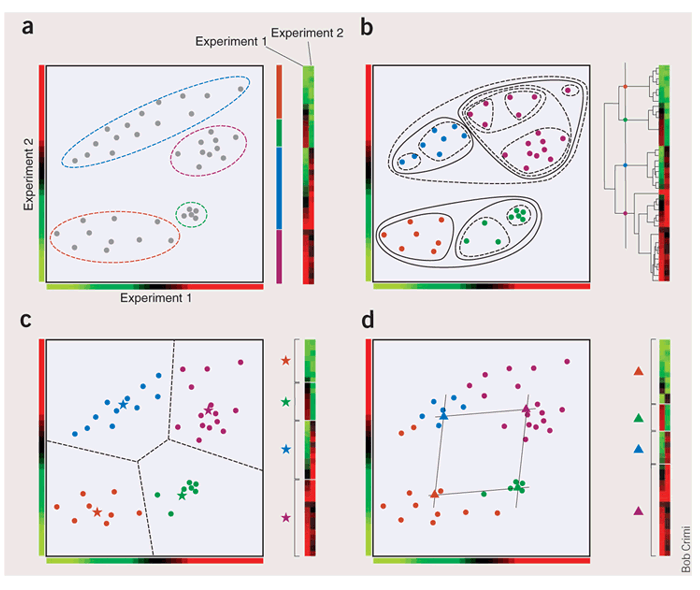


<small>
(a) El conjunt de dades conté quatre grups de diferents mides, formes i nombres de gens. Esquerra: cada punt representa un gen, representat en funció del seu valor d'expressió en les dues condicions experimentals. Es va utilitzar per agrupar la distància euclidiana, que correspon a la distància en línia recta entre els punts d'aquest gràfic. Dreta: la representació estàndard de color vermell-verd de les dades i les identitats de clúster corresponents. (b) La agrupació jeràrquica troba tota una jerarquia de clústers. L'arbre es va tallar al nivell indicat per donar quatre clústers. Alguns dels superclústers i subclústers estan il·lustrats a l'esquerra. (c) k-means (amb k = 4) divideix l'espai en quatre subespais, depenent de quin dels quatre centroides del clúster (estrelles) estigui més proper. (d) SOM troba clústers, que s'organitzen en una estructura de quadrícula (en aquest cas, una quadrícula simple 2 x 2).

Extret del següent article:
Com funciona l'agrupació d'expressió gènica?
Patrik D'haeseleer, [Nature Biotechnology 23, 1499 - 1501 (2005)](http://www.nature.com/nbt/journal/v23/n12/fig_tab/nbt1205-1499_F1.html)
doi:10.1038/nbt1205-1499
        </small></center>

### 3.1 Taxonomia dels algorismes de clustering:

Hi ha dues grans famílies de tècniques d'agrupació:

+ *Algorismes particionals:* Comença amb una partició aleatòria i perfecciona-la iterativament.
+ *Algorismes jeràrquics:* Aglomeratiu (bottom-up), top-down.

**Algorismes particionals**

Els algorismes de particions es poden dividir en dues branques:

+ Els algorismes de partició restrictiva (Hard partition), com ara *K-means*, assignen un valor de clúster únic a cada element de l'espai de característiques.
+ Els algorismes de partició suau, com ara * Mescla de Gaussians *, es poden veure com a estimadors de densitat i assignen una confiança o probabilitat a cada punt de l'espai.

Per tal de construir la nostra intuïció sobre l'agrupació, començarem amb el mètode més senzill, però un dels més famosos: K-means.

### 3.2 Algorisme de K-means

**Algorisme:**
1. Inicialitzar el valor $K$ dels clústers desitjables.
2. Inicialitzar els centres de clúster $K$, p. ex. aleatòriament.
3. Decidiu les pertinences a classe de les N mostres de dades assignant-les als centroides del clúster més propers (per exemple, el centre de gravetat o la mitjana).
4. Torneu a estimar els centres de clúster de $K$, assumint que les pertinences trobades més amunt són correctes.
5. Si cap dels N objectes ha canviat de pertinença a l'última iteració, sortiu. En cas contrari, aneu al pas 3.

In [ ]:
from IPython.display import Image
Image(url='https://planetachatbot.com/wp-content/uploads/2021/05/1AzX-3FPncrZaIfWbI5EwCw.gif')

Vegem-ho en acció:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

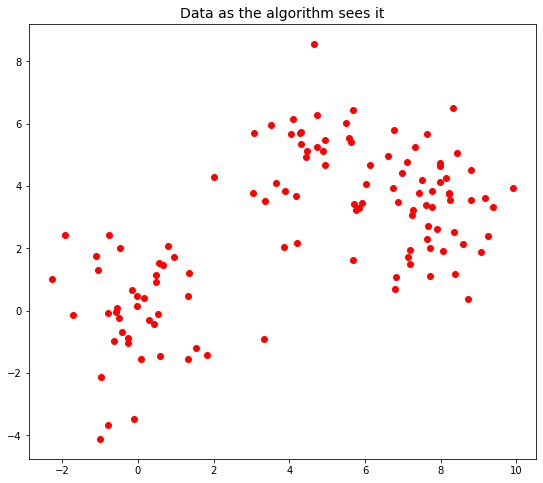

In [ ]:
#Just for visualization purposes, create the labels of the three distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees it', size=14)
plt.gcf().set_size_inches((20,8))


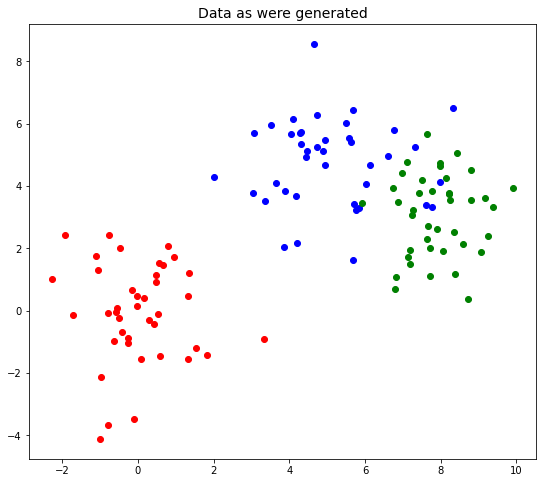

In [ ]:
plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated',size=14)
plt.gcf().set_size_inches((20,8))



In [ ]:
from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

KMeans(init='random', n_clusters=3)

**Nota**: cada algorisme d'agrupació ve en dues variants: una classe, que implementa el mètode *fit* per aprendre els clústers a les dades de'entrenament, i una funció *predict*, que, donades les dades de prova, retorna una matriu d'etiquetes  de nombres enters corresponents als diferents clústers. 

Per a la classe, les etiquetes sobre les dades d'entrenament es poden trobar a l'atribut *labels_*.

In [ ]:
print(clf.labels_[1:45])    # or
print(clf.predict(X)[1:45]) # equivalent

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1]


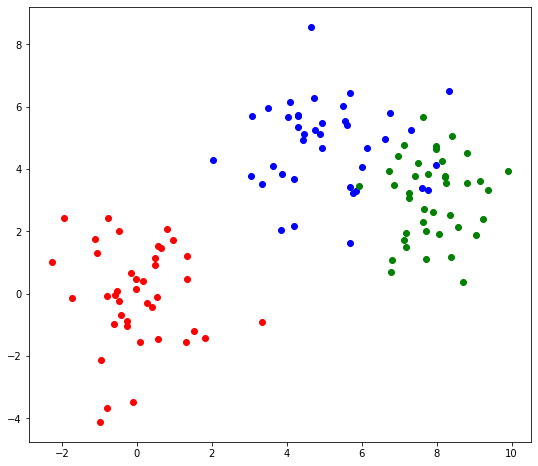

In [ ]:
#Visualizing the data as generated
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((9,8))

In [ ]:
#Let's visualize the kmeans clustering on the space:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape

data=np.c_[XX.ravel(),YY.ravel()] # c_ translates slice objects to concatenation along the second axis.

In [ ]:
Z=clf.predict(data) # returns the labels of the data
print(len(data))
print(Z[1:40000:100])

40000
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 3.2.1 **Quants "agrupaments equivocats" tenim?**

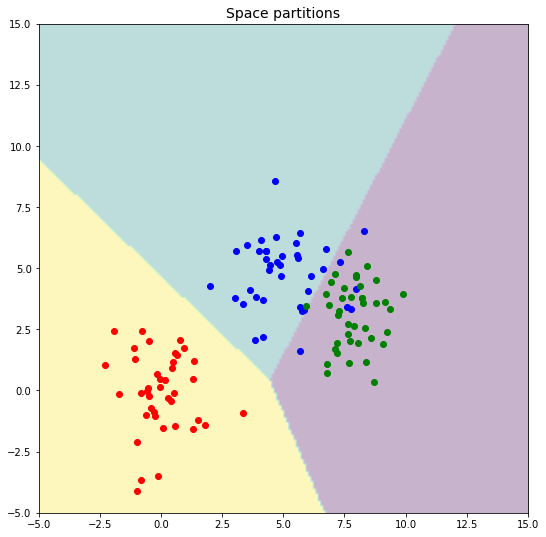

In [ ]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((9,9))

### 3.2.2 Implementació dels kmeans
(OPCIONAL) Realitzem una anàlisi de kmans pas a pas feta a mà:

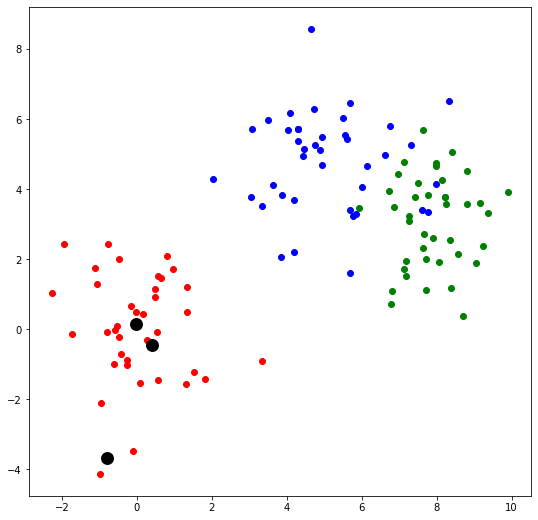

In [ ]:
# Select centroids

from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select three centroids: for example, the first three elements of the data and visualize them by black circles
C=X[:3,:]

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2, zorder=10)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [ ]:
# Determine partition according to centroids
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean') 
                            #Computes distance between each pair of the two collections of inputs.
print(Y)

[[ 4.40552644  7.07791429  7.15756458]
 [ 4.30979688  7.00134358  7.0882026 ]
 [ 4.21428957  6.92538479  7.01959422]
 ...
 [24.33073348 21.10322227 20.9858155 ]
 [24.39528592 21.17185936 21.05697118]
 [24.46008095 21.2407502  21.12836528]]


In [ ]:
#Which is the label of the closest point?
Z = np.argmin(Y,axis=1) 

In [ ]:
print('Obtained labels: ', Z)
print(Z.reshape(sz))

Obtained labels:  [0 0 0 ... 2 2 2]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


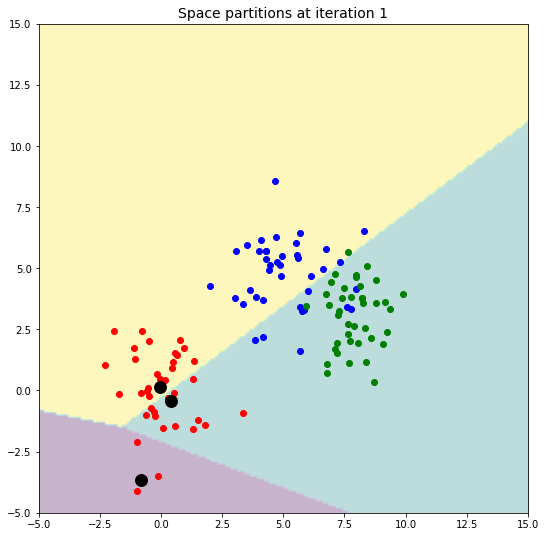

In [ ]:
# Visualize
plt.title('Space partitions at iteration 1', size=14)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [ ]:
#Compute membership for next iteration
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y,axis=1) #finds the minimum in each row, that is the closest center
print(y_pred[1:20])

[1 2 1 1 1 2 2 2 2 1 1 2 2 2 0 2 2 1 2]


In [ ]:
#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

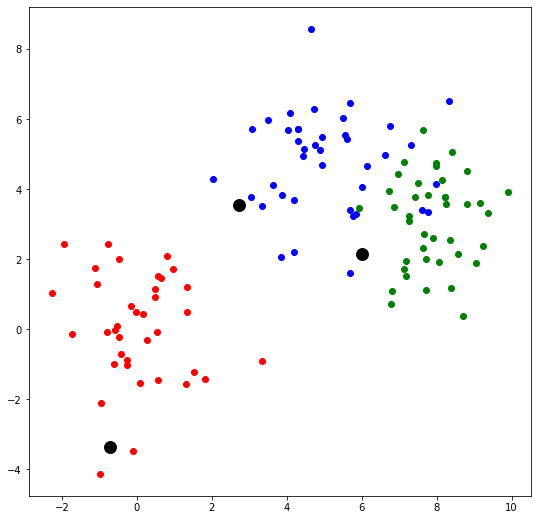

In [ ]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black',linewidths=2,zorder=10)

fig = plt.gcf()
fig.set_size_inches((9,9))

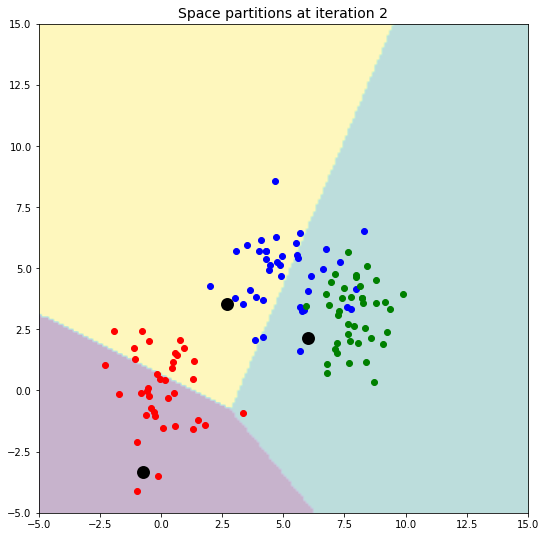

In [ ]:
#And the new area of influence is
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r') # painting original labels with colors
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2,zorder=10)

#Painting the hyperplanes
x = np.linspace(-5,15,200) 
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1) # Determine to whom centroid each point is closest

#Visualize
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 2', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

Aquest procés es repeteix fins que els centroides s'estabilitzen.

### 3.2.3 Comparació dels resultats amb el ground truth

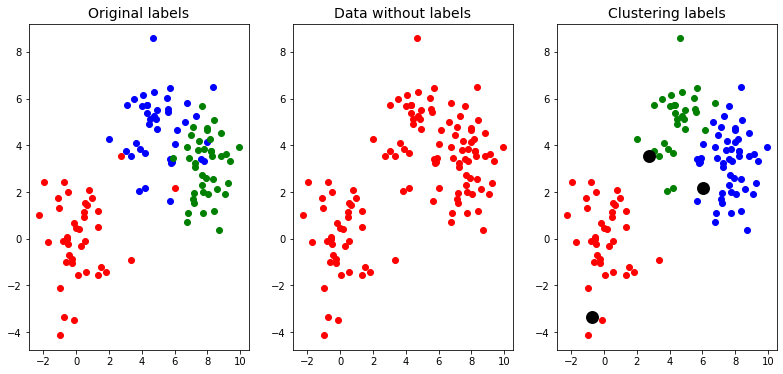

In [ ]:

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r') # r
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2,zorder=10)
fig = plt.gcf()
fig.set_size_inches((13.4,6))


### 3.2.4 K significa com a procediment de minimització

L'algoritme K-means agrupa les dades intentant separar mostres en $n$ grups d'igual variància. En altres paraules, l'algorisme K-means divideix un conjunt de N mostres X en K grups C disjunts, cadascun descrit per la mitjana de les mostres del clúster. Els mitjans s'anomenen comunament el clúster **"centroides"**.

       Els centroides haurien de pertànyer al conjunt de punts original?

L'algoritme K-means pretén triar els centroides minimitzant un criteri conegut com a **inercia** <inertia> o **dins del clúster** suma de quadrats:

  <center>
  Inertia=$\displaystyle\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_{i,j} - \mu_j||^2)$

La **inèrcia**, o el criteri de suma de quadrats dins del clúster, es pot reconèixer com una mesura de la coherència interna dels clústers.

S'han de tenir en compte diverses qüestions:

+ No és determinista: depèn de la **inicialització**.
+ La inèrcia fa la **suposició** que els cúmuls són **convexos i isòtrops** (PER QUÈ?), cosa que no sempre és així. Respon malament als cúmuls allargats, o varietats amb formes irregulars.

+ Pot l'algoritme assegurar **convergir** al mínim global? - Amb el temps suficient, els K-means sempre convergiran.

+ Aquest algorisme requereix que s'especifiqui el **nombre de clústers**.

+ S'escala bé a **gran nombre de mostres** i s'ha utilitzat en una àmplia gamma d'àrees d'aplicació en molts camps diferents.


El càlcul es fa sovint diverses vegades, amb diferents inicialitzacions dels centroides. Un mètode per ajudar a resoldre aquest problema és l'esquema d'inicialització k-means++, que s'ha implementat a scikit-learn (utilitza el paràmetre init='kmeans++'). Això inicialitza els centroides perquè estiguin (generalment) distants els uns dels altres, donant lloc a resultats demostrablement millors que la inicialització aleatòria. 

## 4 Què és un bon agrupament? Definició de mètriques per mesurar la qualitat del clustering

In [ ]:
Image(url='https://i.imgur.com/tBkCqXJ.gif')



L'**índex Rand** o **mesura Rand** (anomenat així en honor a William M. Rand) en estadístiques, i en particular en agrupació de dades, és una mesura de la similitud entre dues agrupacions de dades. Es pot definir una forma de l'índex Rand que s'ajusta per a l'agrupació d'elements atzar, aquest és l'**índex Rand ajustat**. Des del punt de vista matemàtic, l'índex Rand està relacionat amb la accuracy, però és aplicable fins i tot quan no s'utilitzen etiquetes de classe.

Donat un conjunt de n elements $S = \{o_1, \ldots, o_n\}$ i dues particions de S per comparar, $X = \{X_1, \ldots, X_r\}$, una partició de $S$ en $r$ subconjunts, i $Y = \{Y_1, \ldots, Y_s\}$, una partició de $S$ en $s$ subconjunts, defineix el següent:

+ a, el nombre de parells d'elements a S que es troben en el mateix conjunt en X i en el mateix conjunt en Y
+ b, el nombre de parells d'elements a S que es troben en diferents conjunts a X i en diferents conjunts a Y
+ c, el nombre de parells d'elements a S que es troben en el mateix conjunt en X i en conjunts diferents en Y
+ d, el nombre de parells d'elements a S que es troben en diferents conjunts a X i al mateix conjunt a Y.

**Definició**: l'índex Rand, R, és:
$ R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$

Intuïtivament, $a+b$ es pot considerar com el nombre d'acords entre $X$ i $Y$ i $c + d$ com el nombre de desacords entre $X$ i $Y$.

Com que el denominador és el nombre total de parells, l'índex Rand representa la freqüència d'ocurrència d'acords sobre el total de parells.


## 4.1 Calcula les **puntuació d'homogeneïtat, completesa i V-Measure**

Un resultat d'agrupació satisfà **homogeneïtat** (homogeneity) si tots els seus clústers contenen només punts de dades que són membres de la mateixa classe original (una única).

Un resultat d'agrupació satisfà **completitud** (completeness) si tots els punts de dades que són membres d'una classe determinada són elements del mateix clúster predit.

Ambdues puntuacions tenen valors positius entre 0,0 i 1,0, essent desitjables valors més grans.

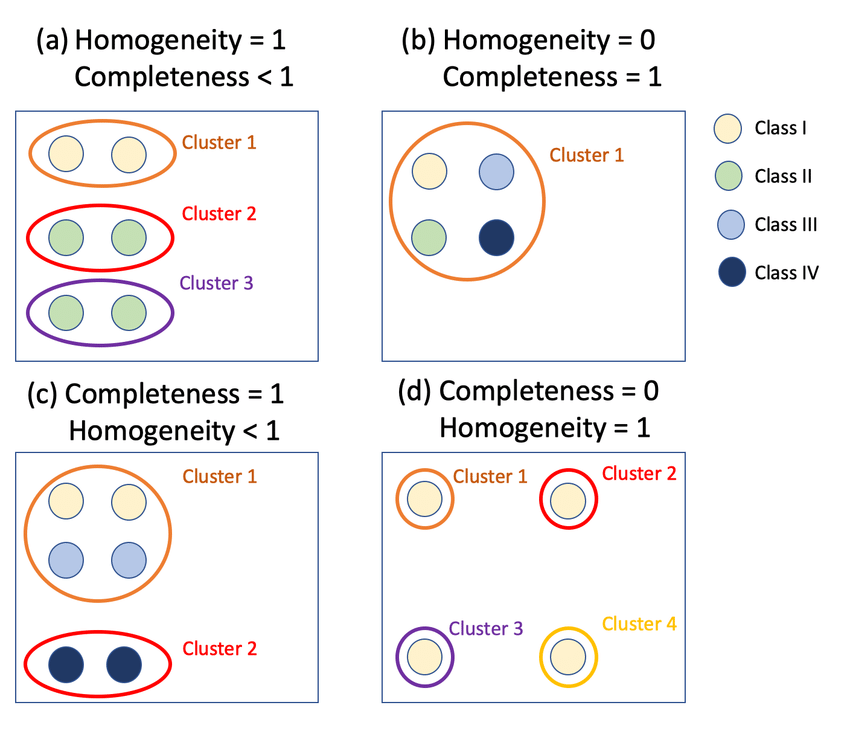

In [ ]:
from sklearn import metrics

# metrics.homogeneity_score(labels_true, labels_pred)
metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000


In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000


In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.000


In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


In [ ]:
print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0


In [ ]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

1.0


In [ ]:
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

0.9999999999999999


In [ ]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.0


In [ ]:
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.0


## 4.2 V-measure

**V-measure** etiquetatge de clúster donat una ground truth:  

La V-mesura és la *mitjana harmònica* entre homogeneïtat i completitud:

   $v = 2 * (homogeneïtat * completesa) / (homogeneïtat + completesa)$

La mètrica depèn dels valors absoluts de les etiquetes?: una permutació dels valors de l'etiqueta de classe o clúster canviarà el valor de la puntuació d'alguna manera?

La mètrica és simètrica respecte a la commutació label_true amb label_pred?

Això pot ser útil per mesurar l'acord de dues estratègies d'assignació d'etiquetes independents en el mateix conjunt de dades quan no es coneix el ground truth

Els etiquetatges perfectes són alhora homogenis i complets, per tant tenen una puntuació d'1,0:

In [ ]:
print(metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))

print (metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0
1.0


**Pregunta:** Les etiquetes que assignen **tots els membres de les classes als mateixos grups** són: __, però no __:

In [ ]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.000
0.000
0.000
0.800
0.667


Els etiquetatges que tenen clústers purs amb membres procedents de les mateixes classes són _____ però les divisions innecessàries perjudiquen ____ i, per tant, també penalitzen la mesura V:

In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800
0.667


Si els membres de les classes estan **completament dividits en diferents clústers**, l'assignació és totalment incompleta, per tant, la V-Measure és nul·la:

In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000


Els clústers que inclouen mostres de classes totalment diferents destrueixen totalment ____ de l'etiquetatge, per tant:


In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


### Resum
**Avantatges**

+ *Puntuacions limitades*: 0.0 és nefast, 1.0 és una puntuació perfecta.

+ *Interpretació intuïtiva*: l'agrupació amb una mala mesura V es pot analitzar qualitativament en termes d'homogeneïtat i exhaustivitat per sentir millor quin "tipus" d'errors fa la tasca.

+ *No es fa cap suposició* sobre l'estructura del clúster: es pot utilitzar per comparar algorismes d'agrupament com ara K-means que assumeix formes de blob **isòtropes** amb resultats d'algoritmes d'agrupament espectral que poden trobar clúster amb formes "plegades".

**Inconvenients**

+ Les mètriques introduïdes anteriorment **no estan normalitzades pel que fa a l'etiquetatge aleatori**: això vol dir que, depenent del nombre de mostres, clústers i ground truth, un etiquetatge completament aleatori no sempre donarà els mateixos valors d'homogeneïtat, completesa i per tant V-mesure. En particular, l'etiquetatge aleatori no donarà puntuacions zero, especialment quan el nombre de clústers és gran.

+ Aquest problema es pot ignorar amb seguretat quan **el nombre de mostres** és alt, és a dir, més de mil i el nombre de clústers és inferior a 10.

+ Aquestes mètriques requereixen el **coneixement de les classes de la ground truth** encara que gairebé mai no estan disponibles a la pràctica o requereixen una assignació manual per part d'anotadors humans (com en l'entorn d'aprenentatge supervisat).

*I si no tenim el ground truth?*


##  4.3 Silhouette Coefficient

El **Coeficient de la silueta** es calcula utilitzant la *distància mitjana intra-clúster* (a) i la *distància mitjana del clúster més proper* (b) per a cada mostra. El coeficient de silueta d'una mostra és:

                            (b - a) / max(a, b).

on b és la distància entre una mostra i el clúster més proper del qual la mostra no forma part. Tingueu en compte que el coeficient de silueta només es defineix si el nombre d'etiquetes és:  $ 2 <= n_{labels} <= n_{samples} - 1$


**Avantatges**

La puntuació està limitada entre -1 i +1. Un valor de 0 indica que la mostra està al límit o molt a prop del límit de decisió entre dos clústers veïns i els valors negatius indiquen que aquestes mostres podrien haver estat assignades al clúster incorrecte.

La puntuació és més alta quan els clústers són densos i ben separats, cosa que es relaciona amb un concepte estàndard de clúster.

**Inconvenients**

El coeficient de silueta és generalment més alt per als clusters convexos.

## 4.4 Evaluating kmeans

In [ ]:
from sklearn import metrics
from sklearn import cluster

K=3
clf = cluster.KMeans(n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
    

KMeans(n_clusters=3, random_state=0)

0.71


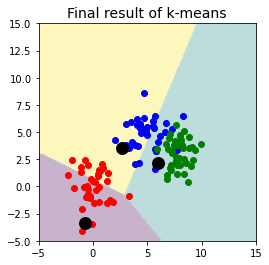

In [ ]:
#visualize
plt.subplot(1,1,1)
plt.title('Final result of k-means', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2,zorder=10)

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)



print ('%.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))

In [ ]:
clf = cluster.KMeans(n_clusters=K, init='k-means++',  max_iter=300, n_init=2) 
                                        #initialize the k-means clustering
clf.fit(X)                              #run the k-means clustering
# n_init - default=10
# Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

print('Final evaluation of the clustering:')
print('Inertia: %.2f' %  clf.inertia_)
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y.ravel(), clf.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y.ravel(), clf.labels_))             
print('V_measure %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, clf.labels_,  metric='euclidean'))

Final evaluation of the clustering:
Inertia: 366.93
Adjusted_rand_score 0.71
Homogeneity 0.73
Completeness 0.74
V_measure 0.74
Silhouette 0.53


In [ ]:
clf1 = cluster.KMeans(n_clusters=K,  init='random',max_iter=300, n_init=2) 
                                    #initialize the k-means clustering
clf1.fit(X)                         #run the k-means clustering
print('Final evaluation of the clustering:')
print ('Inertia: %.2f' % clf1.inertia_)
print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf1.labels_))
print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(), clf1.labels_))
print ('Completeness %.2f' % metrics.completeness_score(y.ravel(), clf1.labels_))
print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(), clf1.labels_))
print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_, metric='euclidean'))

Final evaluation of the clustering:
Inertia: 367.15
Adjusted_rand_score 0.77
Homogeneity 0.76
Completeness 0.77
V_measure 0.77
Silhouette 0.52


### Elbow Curve o comparació d'inèrcies de clústers

En l'anàlisi de clústers, el mètode del colze és una heurística que s'utilitza per determinar el nombre de clústers en un conjunt de dades. El mètode consisteix a representar la variació explicada en funció del nombre de clústers, i escollir el colze de la corba com el nombre de clústers a utilitzar. 

El mateix mètode es pot utilitzar per triar el nombre de paràmetres en altres models basats en dades, com ara el nombre de components principals per descriure un conjunt de dades.

In [ ]:
distorsions = []
n_clusters = range(2, 10)
for k in n_clusters:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

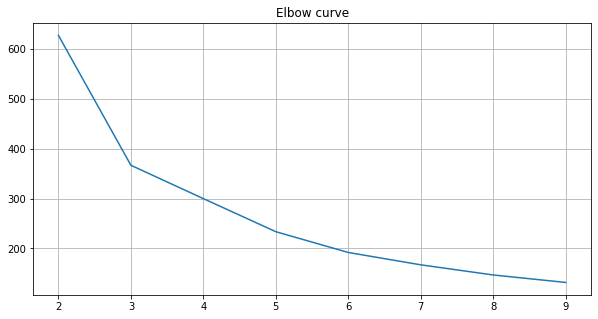

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(n_clusters, distorsions)
plt.grid(True)
plt.title('Elbow curve')

**Notes:** Algunes "seeds" poden provocar una taxa de convergència baixa o una convergència cap a agrupacions subòptimes:
 
#### resum K means
 
  + (+) Proveu diversos punts de partida.
  + (+) Inicialitzar amb els resultats d'un altre mètode.
 
 
  + (-) Tendeix a buscar cúmuls esfèrics.
  + (-) Propens a l'estabilització de mínims locals.

## 5. CASE STUDY: Credit cards data analysis


Aquest cas requereix desenvolupar una segmentació de clients per definir l'estratègia de màrqueting.

No tots els clients són iguals. Els consumidors solen mostrar una gran varietat de comportaments. Moltes vegades, els segments que s'utilitzen a les empreses es basen en llindars. Amb un nombre creixent de característiques i un tema general de productes personalitzats, hi ha una necessitat d'una metodologia basada en la ciència per agrupar els clients. 

**L'objectiu d'aquesta anàlisi és agrupar els titulars de targetes de crèdit en grups adequats per entendre millor les seves necessitats i comportaments i servir-los millor amb ofertes de màrqueting adequades.**

El conjunt de dades de mostra resumeix el comportament d'ús d'uns 9.000 titulars de targetes de crèdit actius durant els darrers 6 mesos. El fitxer es troba a nivell de client amb 18 variables de comportament.

Val la pena entendre a què corresponen aquestes columnes:
> 
> - BALANCE : Balance amount left in customers account to make purchases
> - BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0  and 1
> - PURCHASES : Amount of purchases made from account
> - ONEOFF_PURCHASES : Maximum purchase amount done in one-go
> - INSTALLMENTS_PURCHASES : Amount of purchase done in installment
> - CASH_ADVANCE : Cash in advance given by the user
> - PURCHASES_FREQUENCY : How frequently the Purchases are being made, score  between 0 and 1
> - ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
> - PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are  being done
> - CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
> - CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
> - PURCHASES_TRX : Number of purchase transactions made
> - CREDIT_LIMIT : Limit of Credit Card for user
> - PAYMENTS : Amount of Payment done by user
> - MINIMUM_PAYMENTS : Minimum amount of payments made by user
> - PRCFULLPAYMENT : Percent of full payment paid by user
> - TENURE : Tenure of credit card service for user (Period from the date of  disbursement of loan to the date of the last EMI payment or the date of closure)
> 
> Where (1=frequent, 0=not frequent)

### L'objectiu és segmentar els clients (titulars de la targeta) per tal de definir una estratègia de màrqueting.

- Quants clústers veiem?

- Com els podem caracteritzar?

- Ens falten dades i com les gestionarem?

**Suggeriment:** Potser trobarem grups com:

* Grans despeses amb grans pagaments

* Avanços en efectiu amb grans pagaments, etc.

### Quina estratègia de màrqueting proposem?

Com és habitual, comencem important les biblioteques i les dades. Comprovarem els valors que falten.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv("data/CC GENERAL.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

## Reformatting the data

In [ ]:
data=data.drop(['CUST_ID'], axis=1)
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
datadrop=data.dropna(axis=1)
datadrop.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX     PAYMENTS  \
0                0.000000                 0              2   201.802084   
1                0.250000                 4              0  4103.032597   
2                0.000000                 0             12   622.066742   
3                0.083333                 1              1     0.000000   
4                0.000000                 0              1   678.334763   

   PRC_FULL_PAYMENT  TENURE  
0          0.000000      12  
1          0.222222      12  
2          0.000000      12  
3          0.000000      12  
4          0.000000      12

In [ ]:
datafill=data.fillna(data.mean())
datafill.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
missing = data.isnull().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
missing = datadrop.isnull().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## 5.2 Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
datadropnorm = pd.DataFrame(scaler.fit_transform(datadrop), columns = datadrop.columns)

Let's visualize it:

In [ ]:
datadropnorm.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.950000e+03       8.950000e+03  8.950000e+03      8.950000e+03   
mean   4.195651e-16       1.209548e-14 -9.278518e-16      3.916048e-15   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -7.516398e-01      -3.703271e+00 -4.695519e-01     -3.569340e-01   
25%   -6.900078e-01       4.904486e-02 -4.510006e-01     -3.569340e-01   
50%   -3.320286e-01       5.180838e-01 -3.004541e-01     -3.340396e-01   
75%    2.352559e-01       5.180838e-01  5.004652e-02     -9.056763e-03   
max    8.397489e+00       5.180838e-01  2.248351e+01      2.420107e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.950000e+03  8.950000e+03         8.950000e+03   
mean             2.275424e-15  5.697020e-15        -3.716084e-16   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -4.545762e-01 -4.667856e-01        -1.221758e+00   
25%             -4.545762e-01 -4.667856e-01        -1.014125e+00   
50%             -3.561562e-01 -4.667856e-01         2.404259e-02   
75%              6.366321e-02  6.435242e-02         1.062211e+00   
max              2.442689e+01  2.201112e+01         1.269843e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.950000e+03                      8.950000e+03   
mean                 2.021052e-15                      2.353921e-16   
std                  1.000056e+00                      1.000056e+00   
min                 -6.786608e-01                     -9.169952e-01   
25%                 -6.786608e-01                     -9.169952e-01   
50%                 -3.993193e-01                     -4.976286e-01   
75%                  3.269728e-01                      9.701506e-01   
max                  2.673451e+00                      1.599199e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX      PAYMENTS  \
count            8.950000e+03      8.950000e+03   8.950000e+03  8.950000e+03   
mean             5.856519e-16     -7.151821e-16  -3.570713e-15 -3.264056e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -6.753489e-01     -4.760698e-01  -5.917959e-01 -5.986883e-01   
25%             -6.753489e-01     -4.760698e-01  -5.515646e-01 -4.662913e-01   
50%             -6.753489e-01     -4.760698e-01  -3.101767e-01 -3.026846e-01   
75%              4.351492e-01      1.100739e-01   9.213645e-02  5.802976e-02   
max              6.820521e+00      1.754785e+01   1.381101e+01  1.692228e+01   

       PRC_FULL_PAYMENT        TENURE  
count      8.950000e+03  8.950000e+03  
mean      -2.199184e-15  1.556446e-14  
std        1.000056e+00  1.000056e+00  
min       -5.255510e-01 -4.122768e+00  
25%       -5.255510e-01  3.606795e-01  
50%       -5.255510e-01  3.606795e-01  
75%       -3.712234e-02  3.606795e-01  
max        2.893453e+00  3.606795e-01

## 5.3 Let's cluster the data

In [ ]:
from sklearn import cluster

K=3

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(datadropnorm)
y_pred = clf.predict(datadropnorm)
 

In [ ]:
print(y_pred[1:50])

[2 1 2 2 1 0 1 2 2 1 2 1 1 2 2 2 1 1 1 1 0 1 0 2 1 2 1 2 1 0 1 2 1 1 2 2 1 2 2 2 1 2 2 1 2 2 2 1 2]


In [ ]:
print(clf.inertia_)

95962.30742789092


In [ ]:
from sklearn import metrics

print('Silhouette %.2f' %  metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean'))

Silhouette 0.21


## 5.4. Find the best K

In [ ]:
inrt=np.zeros(12)
sil_kmeans=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        clf = cluster.KMeans(init='random', n_clusters=i*3+3, random_state=0)
        clf.fit(datadropnorm)
        inrt[i]=clf.inertia_
        sil_kmeans[i]=metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean')
        

k: 3
k: 6
k: 9
k: 12
k: 15
k: 18
k: 21
k: 24
k: 27
k: 30
k: 33
k: 36


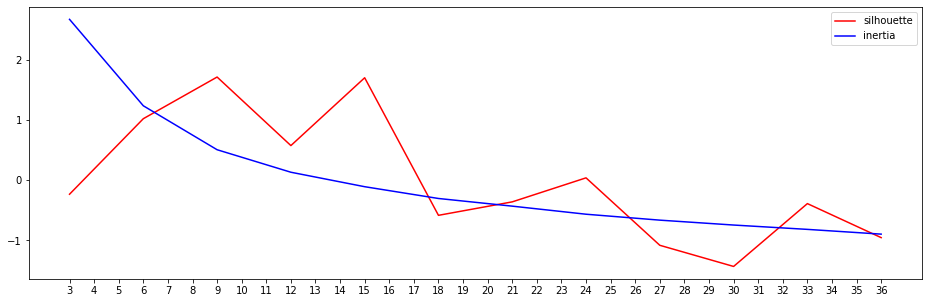

In [ ]:
#visualize
import warnings
warnings.filterwarnings("ignore")

plt.plot(np.arange(12)*3+3,scaler.fit_transform(sil_kmeans.reshape(-1, 1)),'r', label='silhouette')
plt.plot(np.arange(12)*3+3,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))
plt.xticks(np.arange(min(np.arange(12)*3+3), max(np.arange(12)*3+3)+1, 1.0));


### Recompute with the optimal K=9

In [ ]:
k=9
clf = cluster.KMeans(init='random', n_clusters=k, random_state=0)
clf.fit(datadropnorm)
inrt_opt=clf.inertia_
sil_opt=metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean')
print('Optimal inertia:', inrt_opt, 'Optimal silhouette:', sil_opt)    

Optimal inertia: 56071.471978870504 Optimal silhouette: 0.2423229547344951


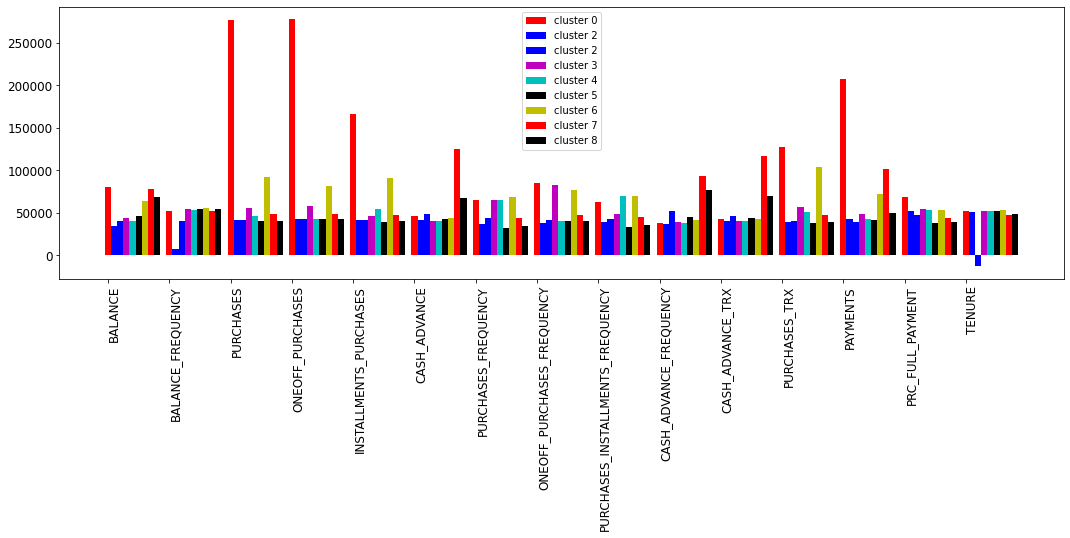

In [ ]:
#visualize it
width=0.1
p0 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(datadropnorm[(clf.labels_==0)]).mean(axis=0),width,color='r', label='cluster 0')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+1*width,scaler.inverse_transform(datadropnorm[(clf.labels_==1)]).mean(axis=0),width,color='b', label='cluster 2')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(datadropnorm[(clf.labels_==2)]).mean(axis=0),width,color='b', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(datadropnorm[(clf.labels_==3)]).mean(axis=0),width,color='m', label='cluster 3')
p4 = plt.bar(np.arange(datadropnorm.shape[1])+4*width,scaler.inverse_transform(datadropnorm[(clf.labels_==4)]).mean(axis=0),width,color='c', label='cluster 4')
p5 = plt.bar(np.arange(datadropnorm.shape[1])+5*width,scaler.inverse_transform(datadropnorm[(clf.labels_==5)]).mean(axis=0),width,color='k', label='cluster 5')
p6 = plt.bar(np.arange(datadropnorm.shape[1])+6*width,scaler.inverse_transform(datadropnorm[(clf.labels_==6)]).mean(axis=0),width,color='y', label='cluster 6')
p7 = plt.bar(np.arange(datadropnorm.shape[1])+7*width,scaler.inverse_transform(datadropnorm[(clf.labels_==7)]).mean(axis=0),width,color='r', label='cluster 7')
p8 = plt.bar(np.arange(datadropnorm.shape[1])+8*width,scaler.inverse_transform(datadropnorm[(clf.labels_==8)]).mean(axis=0),width,color='k', label='cluster 8')

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

Recall:
- BALANCE : Balance amount left in customers account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Number of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user (Period from the date of disbursement of loan to the date of the last EMI payment or the date of closure)

Where (1=frequent, 0=not frequent)

## 6 Agrupació jeràrquica

Una altra tècnica de agrupació interessant és la agrupació jeràrquica. La agrupació jeràrquica és una família general d'algorismes de agrupació que construeixen clústers imbricats *fusionant-los o dividint-los* successivament. Aquesta jerarquia de clústers es representa com un arbre (o dendrograma). L'arrel de l'arbre és l'únic clúster que recull totes les mostres, sent les *fulles* els grups amb només una mostra. Aquesta és una bona eina, per la seva interpretabilitat. El resultat de la tècnica és un *arbre* que mostra la similitud entre les mostres. *La partició* es calcula seleccionant un tall en aquest arbre a un nivell determinat. L'arbre se sol anomenar **dendrograma**.

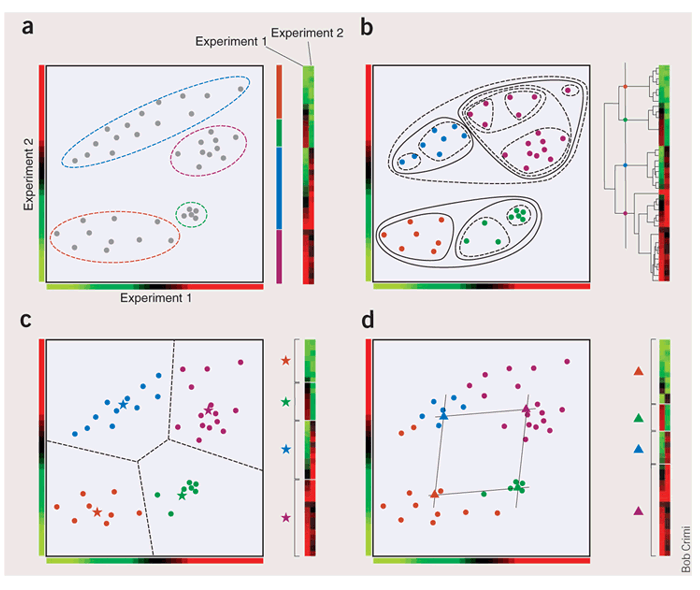

### 6.1 Diferents agrupacions jeràrquiques

**Esbós de l'algorisme de agrupació aglomerativa de baix a dalt (bottom-up)**

+ Comença amb cada mostra de dades en un clúster independent.
+ Aleshores, s'uneix repetidament al parell de clústers més proper.
+ Fins que només hi ha un clúster.

La història de la fusió forma un arbre binari o jerarquia.

**Esbós de l'algorisme d'agrupació divisoria de dalt a baix**

+ Començant amb totes les dades en un sol clúster.
+ Considereu totes les maneres possibles de dividir el clúster en dos. Tria la millor divisió.
+ Operar recursivament a ambdós costats.

### 6.2 Aglomeració aglomerativa

L'**AgglomerativeClustering** realitza una agrupació jeràrquica mitjançant un enfocament de baix a dalt: cada observació comença en el seu propi clúster i els clústers es fusionen successivament.

**Definint la similitud de dos clústers:**

El criteri d'enllaç determina la mètrica utilitzada per a l'estratègia de combinació:

+ L'enllaç *únic* funciona amb la semblança de dos membres més semblants. Pot crear efectes en cadena, com ara seguir el veí més proper.

+ L'enllaç *màxim* o *complet* minimitza la distància màxima entre observacions de parells de cúmuls. A partir de la similitud dels dos membres menys semblants, donarà cúmuls esfèrics ajustats.

+ L'enllaç *mitjana* fa la mitjana de la similitud entre els membres, és a dir, minimitza la mitjana de les distàncies entre totes les observacions de parells de clústers.

+ *Ward* minimitza la suma de diferències al quadrat dins de tots els clústers. És un enfocament que minimitza la variància i, en aquest sentit, és similar a la funció objectiu k-means però abordat amb un enfocament jeràrquic aglomeratiu.

AgglomerativeClustering també pot *escalar a un gran nombre* de mostres quan s'utilitza conjuntament amb una *matriu de connectivitat*, però és car computacionalment quan no s'afegeixen restriccions de connectivitat entre mostres: considera a cada pas totes les fusions possibles.

plot_digits_linkage_001.png

plot_digits_linkage_002.png

plot_digits_linkage_003.png

El clústering aglomeratiu té un comportament **"els rics es fan més rics"** que condueix a *mides de clúster desiguals*. En aquest sentit, complet linkage és la pitjor estratègia, i *Ward* dóna les mides més habituals.

Tanmateix, l'**afinitat** no es pot abordar amb Ward, per tant, per a mètriques no euclidianes, *l'enllaç mitjà* és una bona alternativa.

### 6.3 **Adding connectivity constraints**

Un aspecte interessant de la agrupació aglomerativa és que es poden afegir restriccions de connectivitat a aquest algorisme (només es poden fusionar punts/clústers adjacents).

Això s'aconsegueix mitjançant una matriu de connectivitat que defineix per a cada mostra les mostres veïnes seguint una estructura determinada de les dades.

- Per exemple, a l'exemple de swiss-roll següent, les restriccions de connectivitat prohibeixen la fusió de punts que no són adjacents al swiss roll i, per tant, eviten formar grups que s'estenen a través de plecs superposats del rotllo.

plot_ward_structured_vs_unstructured_0011.png

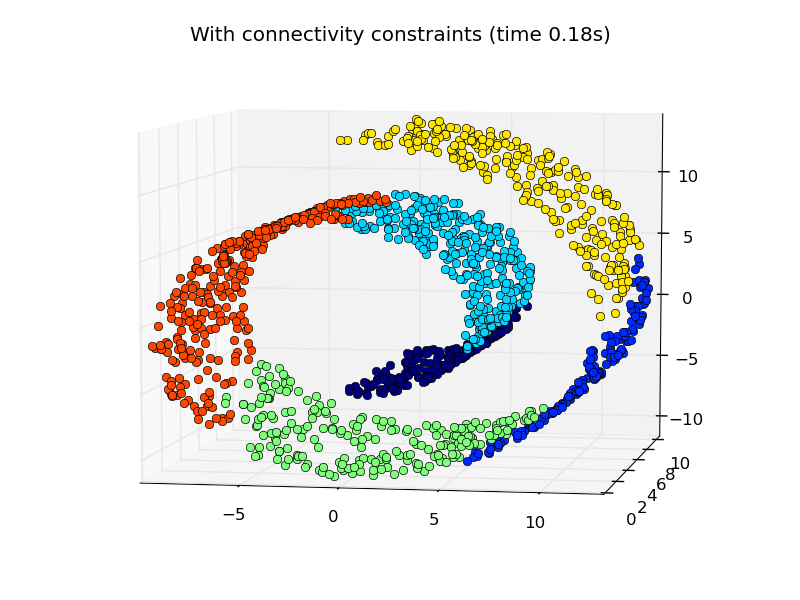

Aquestes restriccions són útils per imposar una determinada estructura local, però també fan que l'algorisme sigui més ràpid, especialment quan el nombre de mostres és elevat. Les restriccions de connectivitat s'imposen mitjançant una matriu de connectivitat: una matriu scipy dispersa que només té elements a la intersecció d'una fila i una columna amb índexs del conjunt de dades que s'haurien de connectar.

Aquesta matriu es pot construir a partir d'informació a priori: per exemple, és possible que vulgueu agrupar pàgines web només fusionant pàgines amb un enllaç que apunta d'una a una altra. També es pot aprendre de les dades, per exemple utilitzant sklearn.neighbors.kneighbors_graph per restringir la fusió als veïns més propers com en aquest exemple, o utilitzant sklearn.feature_extraction.image.grid_to_graph per permetre només la fusió dels píxels veïns d'una imatge.

### 6.4 Il·lustració de l'efecte de connectivitat

(OPCIONAL) [Clúster aglomeratiu amb i sense estructura](http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html#example-cluster-plot-agglomerative-clustering-py)

Aquest exemple mostra l'efecte d'imposar un gràfic de connectivitat per capturar l'estructura local de les dades. El gràfic és simplement el gràfic dels 20 veïns més propers.
Es poden veure dues conseqüències d'imposar una connectivitat.

- La primera agrupació amb una matriu de connectivitat és molt més ràpida.

- En segon lloc, quan s'utilitza una matriu de connectivitat, l'enllaç mitjà i complet són inestables i tendeixen a crear uns quants clústers que creixen molt ràpidament. El gràfic de connectivitat trenca aquest mecanisme.

Aquest efecte és més pronunciat per a gràfics molt escassos (intenta disminuir el nombre de veïns a kneighbors_graph) i amb un enllaç complet.

- En particular, tenir un nombre molt reduït de veïns en el gràfic, imposa una geometria propera a la de l'enllaç únic, que és ben conegut per tenir aquesta inestabilitat de percolació.

In [ ]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

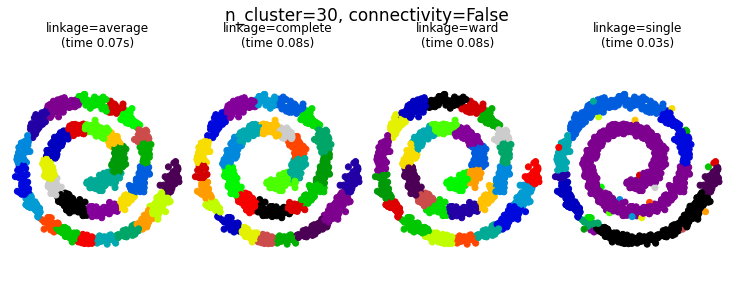

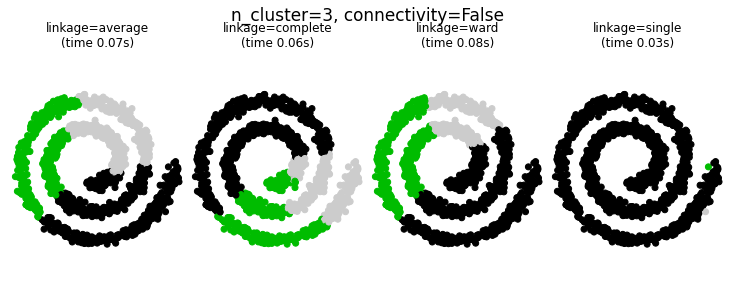

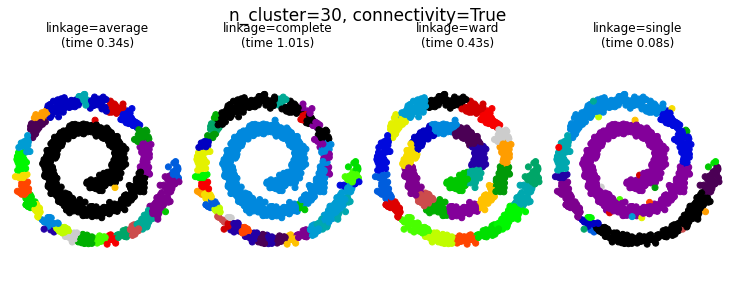

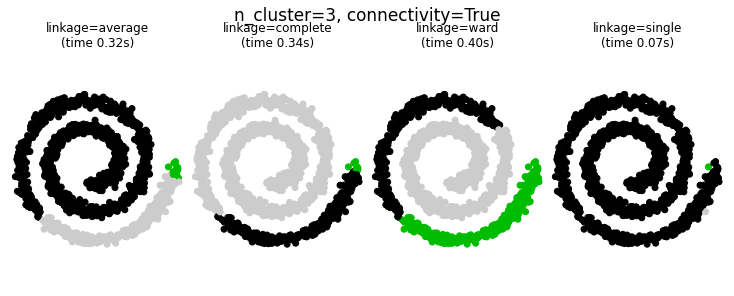

In [ ]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )


plt.show()

## 6.5 Agrupació jeràrquica per a la segmentació de clients

Què passa amb la agrupació jeràrquica? Executem diverses iteracions amb un nombre diferent de clústers i veiem:

In [ ]:
sil_single=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=3*i+3,connectivity=None)
        single.fit(datadropnorm)
        sil_single[i]=metrics.silhouette_score(datadropnorm, single.labels_,  metric='euclidean')
        print('Clusters:[', len(datadropnorm[(single.labels_==0)]),len(datadropnorm[(single.labels_==1)]),
              len(datadropnorm[(single.labels_==2)]),len(datadropnorm[(single.labels_==3)]),']')



k: 3
Clusters:[ 8948 1 1 0 ]
k: 6
Clusters:[ 8945 1 1 1 ]
k: 9
Clusters:[ 8942 1 1 1 ]
k: 12
Clusters:[ 8939 1 1 1 ]
k: 15
Clusters:[ 8935 1 2 1 ]
k: 18
Clusters:[ 8930 3 2 1 ]
k: 21
Clusters:[ 8920 8 2 3 ]
k: 24
Clusters:[ 8 3 8917 1 ]
k: 27
Clusters:[ 8917 3 5 1 ]
k: 30
Clusters:[ 8914 3 5 1 ]
k: 33
Clusters:[ 8910 3 2 3 ]
k: 36
Clusters:[ 8907 3 2 2 ]


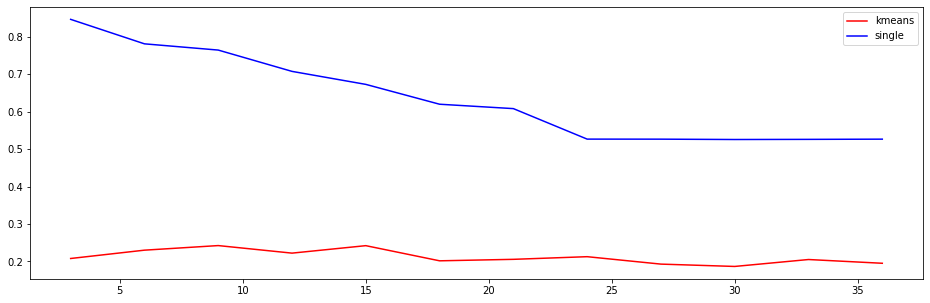

In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Quina agrupació sembla millor? Però realment és trobar la millor solució? Afegim connectivitat i mirem amb atenció els clústers:

In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(datadropnorm, n_neighbors=5)
sil_single_con=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=3*i+3,connectivity=connectivity)
        single.fit(datadropnorm)
        sil_single_con[i]=metrics.silhouette_score(datadropnorm, single.labels_,  metric='euclidean')
        print('Clusters:[', len(datadropnorm[(single.labels_==0)]),len(datadropnorm[(single.labels_==1)]),
              len(datadropnorm[(single.labels_==2)]),len(datadropnorm[(single.labels_==3)]),']')


print(sil_single)

k: 3
Clusters:[ 8948 1 1 0 ]
k: 6
Clusters:[ 8945 1 1 1 ]
k: 9
Clusters:[ 8942 1 1 1 ]
k: 12
Clusters:[ 8939 1 1 1 ]
k: 15
Clusters:[ 8935 1 2 1 ]
k: 18
Clusters:[ 8930 3 2 1 ]
k: 21
Clusters:[ 8920 8 2 3 ]
k: 24
Clusters:[ 8 8917 2 3 ]
k: 27
Clusters:[ 8917 3 5 1 ]
k: 30
Clusters:[ 8914 3 5 1 ]
k: 33
Clusters:[ 8910 3 2 3 ]
k: 36
Clusters:[ 8907 3 2 2 ]
[0.84610885 0.7807723  0.76412823 0.70725225 0.67255305 0.61958708 0.60787725 0.52648043 0.52635688
 0.52542958 0.52579923 0.52636406]


Bé,... no sabem si estem mirant exactament amb aquests clústers... Massa desequilibrats, oi?!

Provem l'aglomeració aglomerativa de barris. Teòricament busca clústers més equivalents i equilibrats.


In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(datadropnorm, n_neighbors=5)
sil_ward_con=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=3*i+3,connectivity=connectivity)
        ward.fit(datadropnorm)
        sil_ward_con[i]=metrics.silhouette_score(datadropnorm, ward.labels_,  metric='euclidean')
        print('Clusters:[', len(datadropnorm[(ward.labels_==0)]),len(datadropnorm[(ward.labels_==1)]),
              len(datadropnorm[(ward.labels_==2)]),len(datadropnorm[(ward.labels_==3)]),']')
print(sil_ward_con)

k: 3
Clusters:[ 4810 422 3718 0 ]
k: 6
Clusters:[ 2884 1096 3718 400 ]
k: 9
Clusters:[ 1096 400 968 896 ]
k: 12
Clusters:[ 896 961 968 2108 ]
k: 15
Clusters:[ 233 353 728 1667 ]
k: 18
Clusters:[ 135 451 968 1667 ]
k: 21
Clusters:[ 714 793 968 120 ]
k: 24
Clusters:[ 968 305 1916 315 ]
k: 27
Clusters:[ 379 348 22 315 ]
k: 30
Clusters:[ 47 874 279 315 ]
k: 33
Clusters:[ 874 315 591 380 ]
k: 36
Clusters:[ 315 18 441 380 ]
[0.1654794  0.17915876 0.16570488 0.18222821 0.17992496 0.18089516 0.16373992 0.15347075 0.14368906
 0.14972806 0.1489219  0.15156793]


In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = None
sil_ward_noc=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        ward_noc = cluster.AgglomerativeClustering(linkage="ward",n_clusters=3*i+3,connectivity=connectivity)
        ward_noc.fit(datadropnorm)
        sil_ward_noc[i]=metrics.silhouette_score(datadropnorm, ward_noc.labels_,  metric='euclidean')
        print('Clusters:[', len(datadropnorm[(ward_noc.labels_==0)]),len(datadropnorm[(ward_noc.labels_==1)]),
              len(datadropnorm[(ward_noc.labels_==2)]),len(datadropnorm[(ward_noc.labels_==3)]),']')
print(sil_ward_noc)

k: 3
Clusters:[ 6384 1154 1412 0 ]
k: 6
Clusters:[ 2774 1132 1412 2955 ]
k: 9
Clusters:[ 2955 1278 922 210 ]
k: 12
Clusters:[ 922 210 655 134 ]
k: 15
Clusters:[ 948 133 787 134 ]
k: 18
Clusters:[ 787 957 491 1235 ]
k: 21
Clusters:[ 957 1235 447 125 ]
k: 24
Clusters:[ 1124 772 447 125 ]
k: 27
Clusters:[ 22 125 651 615 ]
k: 30
Clusters:[ 271 615 1817 340 ]
k: 33
Clusters:[ 346 340 309 18 ]
k: 36
Clusters:[ 340 18 646 102 ]
[0.22600634 0.14858017 0.14456579 0.16791037 0.1854638  0.18861452 0.18770371 0.19236852 0.16307284
 0.16469015 0.12899832 0.13292201]


In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(datadropnorm, n_neighbors=5)
sil_ward_con=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=3*i+3,connectivity=connectivity)
        ward.fit(datadropnorm)
        sil_ward_con[i]=metrics.silhouette_score(datadropnorm, ward.labels_,  metric='euclidean')
        print('Clusters:[', len(datadropnorm[(ward.labels_==0)]),len(datadropnorm[(ward.labels_==1)]),
              len(datadropnorm[(ward.labels_==2)]),len(datadropnorm[(ward.labels_==3)]),']')
print(sil_ward_con)

k: 3
Clusters:[ 4810 422 3718 0 ]
k: 6
Clusters:[ 2884 1096 3718 400 ]
k: 9
Clusters:[ 1096 400 968 896 ]
k: 12
Clusters:[ 896 961 968 2108 ]
k: 15
Clusters:[ 233 353 728 1667 ]
k: 18
Clusters:[ 135 451 968 1667 ]
k: 21
Clusters:[ 714 793 968 120 ]
k: 24
Clusters:[ 968 305 1916 315 ]
k: 27
Clusters:[ 379 348 22 315 ]
k: 30
Clusters:[ 47 874 279 315 ]
k: 33
Clusters:[ 874 315 591 380 ]
k: 36
Clusters:[ 315 18 441 380 ]
[0.1654794  0.17915876 0.16570488 0.18222821 0.17992496 0.18089516 0.16373992 0.15347075 0.14368906
 0.14972806 0.1489219  0.15156793]


In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*3+3,sil_ward_noc.reshape(-1, 1),'g', label='ward')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

L'agrupació aglomerativa de Ward dóna cúmuls més equilibrats, però la silueta es redueix dràsticament apropant-se als cúmuls kmeans.

I sembla que la connectivitat no ajuda. 

Pot ser que els clústers estiguin massa a prop perquè la connectivitat no introdueixi cap diferència...

### Interpreting the data

In [ ]:
#To ease the interpretation let's consider 9 clusters. 
K=9

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(datadropnorm)
y_pred = clf.predict(datadropnorm)

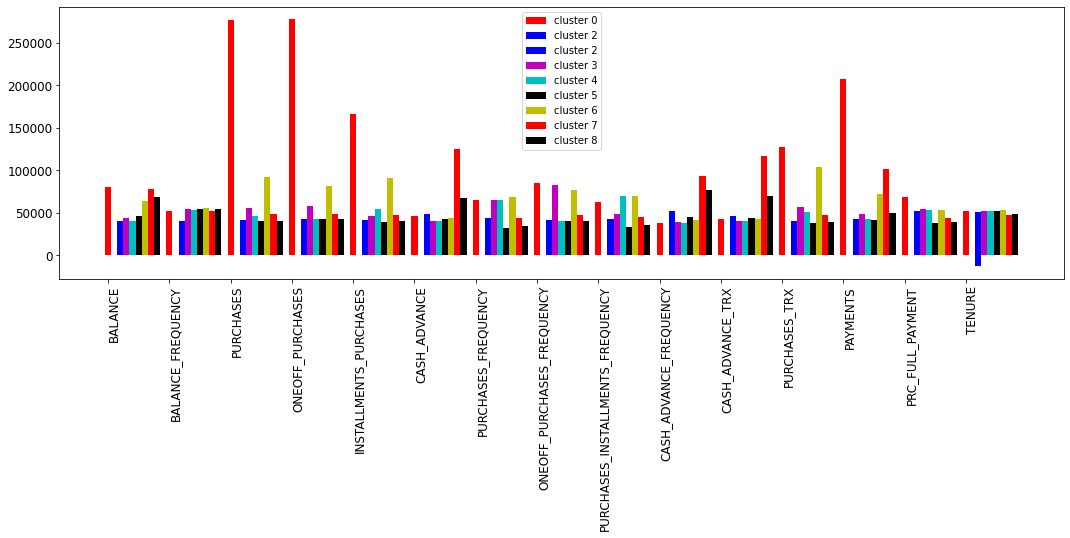

In [ ]:
#visualize in the original space
p0 = width=0.1
plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(datadropnorm[(clf.labels_==0)]).mean(axis=0),width,color='r', label='cluster 0')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(datadropnorm[(clf.labels_==1)]).mean(axis=0),width,color='b', label='cluster 2')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(datadropnorm[(clf.labels_==2)]).mean(axis=0),width,color='b', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(datadropnorm[(clf.labels_==3)]).mean(axis=0),width,color='m', label='cluster 3')
p4 = plt.bar(np.arange(datadropnorm.shape[1])+4*width,scaler.inverse_transform(datadropnorm[(clf.labels_==4)]).mean(axis=0),width,color='c', label='cluster 4')
p5 = plt.bar(np.arange(datadropnorm.shape[1])+5*width,scaler.inverse_transform(datadropnorm[(clf.labels_==5)]).mean(axis=0),width,color='k', label='cluster 5')
p6 = plt.bar(np.arange(datadropnorm.shape[1])+6*width,scaler.inverse_transform(datadropnorm[(clf.labels_==6)]).mean(axis=0),width,color='y', label='cluster 6')
p7 = plt.bar(np.arange(datadropnorm.shape[1])+7*width,scaler.inverse_transform(datadropnorm[(clf.labels_==7)]).mean(axis=0),width,color='r', label='cluster 7')
p8 = plt.bar(np.arange(datadropnorm.shape[1])+8*width,scaler.inverse_transform(datadropnorm[(clf.labels_==8)]).mean(axis=0),width,color='k', label='cluster 8')

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

In [ ]:
ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=9,connectivity=None)
ward.fit(datadropnorm)
sil_ward_opt=metrics.silhouette_score(datadropnorm, ward.labels_,  metric='euclidean')

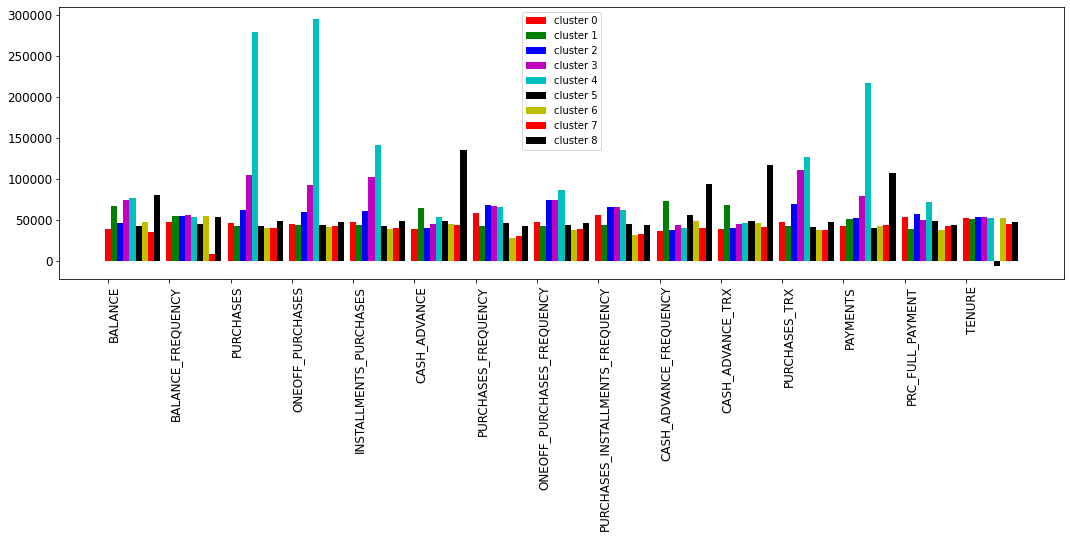

In [ ]:
datadropnorm[(ward.labels_==0)].mean(axis=0).shape

p0 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(datadropnorm[(ward.labels_==0)]).mean(axis=0),width,color='r', label='cluster 0')
p1 = plt.bar(np.arange(datadropnorm.shape[1])+width,scaler.inverse_transform(datadropnorm[(ward.labels_==1)]).mean(axis=0),width,color='g', label='cluster 1')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(datadropnorm[(ward.labels_==2)]).mean(axis=0),width,color='b', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(datadropnorm[(ward.labels_==3)]).mean(axis=0),width,color='m', label='cluster 3')
p4 = plt.bar(np.arange(datadropnorm.shape[1])+4*width,scaler.inverse_transform(datadropnorm[(ward.labels_==4)]).mean(axis=0),width,color='c', label='cluster 4')
p5 = plt.bar(np.arange(datadropnorm.shape[1])+5*width,scaler.inverse_transform(datadropnorm[(ward.labels_==5)]).mean(axis=0),width,color='k', label='cluster 5')
p6 = plt.bar(np.arange(datadropnorm.shape[1])+6*width,scaler.inverse_transform(datadropnorm[(ward.labels_==6)]).mean(axis=0),width,color='y', label='cluster 6')
p7 = plt.bar(np.arange(datadropnorm.shape[1])+7*width,scaler.inverse_transform(datadropnorm[(ward.labels_==7)]).mean(axis=0),width,color='r', label='cluster 7')
p8 = plt.bar(np.arange(datadropnorm.shape[1])+8*width,scaler.inverse_transform(datadropnorm[(ward.labels_==8)]).mean(axis=0),width,color='k', label='cluster 8')

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

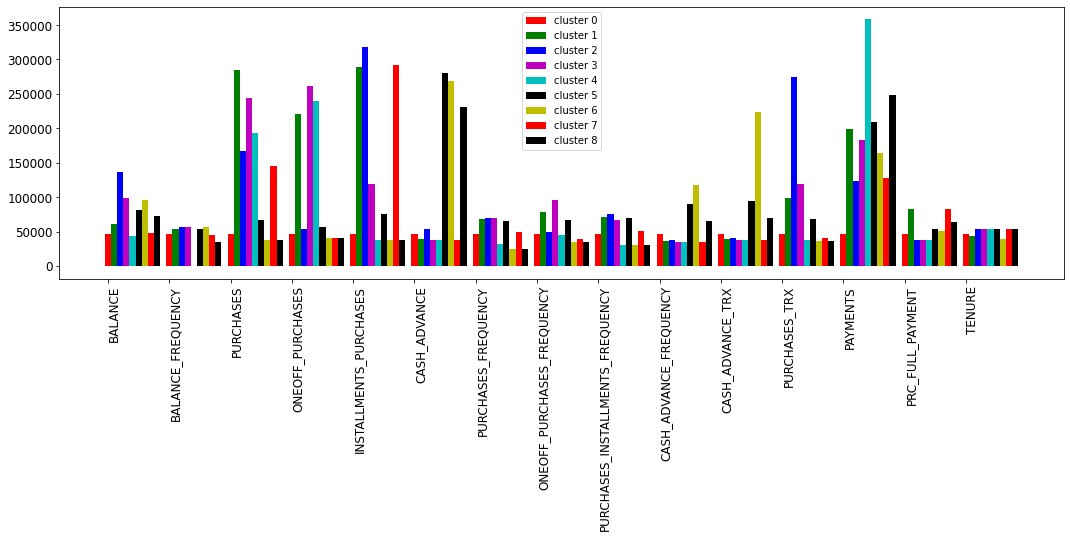

In [ ]:
#Compared to the single clustering:
width=0.1



p0 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(datadropnorm[(single.labels_==0)]).mean(axis=0),width,color='r', label='cluster 0')

p1 = plt.bar(np.arange(datadropnorm.shape[1])+width,scaler.inverse_transform(datadropnorm[(single.labels_==1)]).mean(axis=0),width,color='g', label='cluster 1')
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(datadropnorm[(single.labels_==2)]).mean(axis=0),width,color='b', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(datadropnorm[(single.labels_==3)]).mean(axis=0),width,color='m', label='cluster 3')
p4 = plt.bar(np.arange(datadropnorm.shape[1])+4*width,scaler.inverse_transform(datadropnorm[(single.labels_==4)]).mean(axis=0),width,color='c', label='cluster 4')
p5 = plt.bar(np.arange(datadropnorm.shape[1])+5*width,scaler.inverse_transform(datadropnorm[(single.labels_==5)]).mean(axis=0),width,color='k', label='cluster 5')
p6 = plt.bar(np.arange(datadropnorm.shape[1])+6*width,scaler.inverse_transform(datadropnorm[(single.labels_==6)]).mean(axis=0),width,color='y', label='cluster 6')
p7 = plt.bar(np.arange(datadropnorm.shape[1])+7*width,scaler.inverse_transform(datadropnorm[(single.labels_==7)]).mean(axis=0),width,color='r', label='cluster 7')
p8 = plt.bar(np.arange(datadropnorm.shape[1])+8*width,scaler.inverse_transform(datadropnorm[(single.labels_==8)]).mean(axis=0),width,color='k', label='cluster 8')

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

Mirant el diagrama d'interpretació, es poden definir els grups següents:

**Big Spenders with large Payments** : fan compres cares i tenen un límit de crèdit entre mitjà i alt. Aquest és només un petit grup de clients.

In [ ]:
print('Clusters:[', len(datadropnorm[(ward.labels_==4)]),']')

Clusters:[ 22 ]


    
**Cash Advances with large Payments** - aquest grup pren la majoria d'avançaments en efectiu. Fan grans pagaments, però sembla ser un grup reduït de clients.

In [ ]:
print('Clusters:[', len(datadropnorm[(ward.labels_==5)]),']')

Clusters:[ 655 ]


**Medium Spenders with third highest Payments**-el segon grup de compres més alt (després dels Big Spenders).

In [ ]:
print('Clusters:[', len(datadropnorm[(ward.labels_==1)]),']')

Clusters:[ 1278 ]


**Highest Credit Limit but Frugal**: aquest grup no fa moltes compres. Sembla el tercer grup de clients més gran.

**Cash Advances with Small Payments**: a aquest grup li agrada rebre avançaments en efectiu, però només fa pagaments petits.

**Small Spenders and Low Credit Limit**: tenen els saldos més petits després dels més petits, el seu límit de crèdit es troba als 3 grups inferiors, el segon grup més gran de clients.

**Smallest Spenders and Lowest Credit Limit**: aquest és el grup amb el límit de crèdit més baix, però sembla que no compren gaire. Malauradament, sembla ser el grup més gran de clients.

**Highest Min Payments**: aquest grup té els pagaments mínims més alts (que presumiblement es refereix al "Pagament mínim pendent" a l'extracte mensual. Això podria ser un reflex del fet que tenen el segon límit de crèdit més baix dels grups. així que sembla que el banc els ha identificat com a de major risc.)

### Quina estratègia de màrqueting els proposeu?

## 7 Spectral clustering

El nostre darrer mètode en aquest quadern serà l'agrupació espectral. Per il·lustrar-ho, afegirem una mica de picant al nostre problema. Però abans, comprovem la base teòrica i algorítmica de la tècnica.

Fins a aquest punt, hem considerat l'agrupació com la recerca de grups de dades seguint una noció de **compacitat**. Una altra manera de veure què és un clúster ve donada per la **connectivitat** (o **similitud**).

Comprovem un exemple de la diferència de tots dos:

**Agrupació espectral** es refereix a una família de mètodes que utilitzen tècniques espectrals.

Concretament, aquestes tècniques estan relacionades amb la *descomposició pròpia d'una matriu d'afinitat o semblança* (eigen-decomposition of an affinity or similarity).

Intenten resoldre el problema de la agrupació segons *connectivitat*.

Considerem una matriu de semblança ideal de dos conjunts clars.

L'agrupament en el context de l'aprenentatge automàtic és un problema no supervisat en què heu de dividir "m" observacions en "k" clústers com ara:

- Els punts d'un mateix clúster són molt semblants.
- Els punts en diferents clústers són molt diferents.

La agrupació espectral és un algorisme de agrupació, per la qual cosa podríem dir que ja hem explicat què és en el context de l'aprenentatge automàtic, però la resposta semblarà incompleta.

Per tant, hem de trobar una explicació intuïtiva de l'agrupació espectral.

Per a qualsevol conjunt de dades, podeu veure les dades com un núvol de punts, diguem-ne "m" punts en "n" dimensions. A partir d'aquests punts podeu crear un gràfic on els punts són els nodes i les arestes es ponderen amb la similitud entre els punts.
Per exemple, aquest és un gràfic del famós conjunt de dades MNIST. Cada color representa un dígit.

image.png

mnist.jpeg

Un cop tenim les dades com a gràfic podem crear una matriu d'adjacència on només posem a cada cel·la de la matriu el pes de la arista entre els nodes "i" i "j". Aquesta és una matriu simètrica $m\times m$. Anomenem la matriu d'adjacència $W$.

També podem crear una matriu diagonal de "graus" que tindrà en cada element $A_{ii}$ la suma dels pesos de totes les arestes vinculades al node "i". Anomenem aquesta matriu "$G$"

El laplacià del gràfic es pot calcular com $L=G-W$. Tingueu en compte que totes les files i columnes sumaran zero a causa de la manera com hem definit $W$ i $G$. Hi ha diferents fórmules per $L$, aquesta no és l'única.

Ara que tenim el laplacià del gràfic podem calcular l'espectre d'aquesta matriu, és a dir, es tracta de vectors propis ordenats del més important al menys important. Si agafeu els "k" vectors propis menys significatius, obtindreu una representació en "k" dimensions de cada node del gràfic que també és una representació de cada punt del conjunt de dades. Els vectors propis menys significatius són els associats als valors propis més petits. Aquesta és una forma de reducció de dimensionalitat no lineal.

Cada vector propi proporciona informació sobre la connectivitat del gràfic. La idea de l'agrupació espectral és agrupar els punts utilitzant aquests vectors propis "$k$" com a característiques. Aleshores, agafeu "$k$" els vectors propis menys significatius i teniu els vostres $m$ punts en $k$ dimensions. Executeu un algorisme de agrupació com $K$-means i després teniu el vostre resultat. Aquest "$k$" no és el nombre de clústers és un altre paràmetre que normalment es pot determinar a partir de la gràfica dels valors propis.

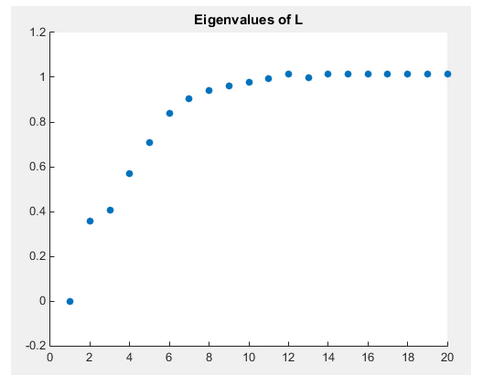

En aquest gràfic podem veure que el gràfic està connectat, només hi ha un valor propi amb valor zero, de manera que només hi ha un component connectat. A partir d'aquest gràfic podríem decidir utilitzar 4, 5 o 6 vectors propis.

Fem una ullada als vectors propis

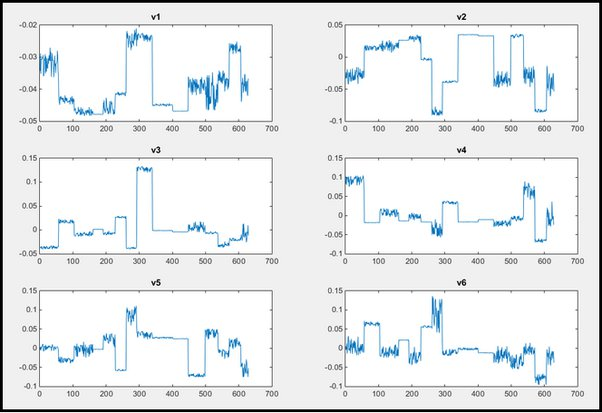

Com podem veure, cada vector propi es podria utilitzar per agrupar, en cada trama de vectors propis alguns punts tenen valors similars, el que significa que ho farien amb el mateix clúster. Cada vector propi aporta informació sobre el nostre gràfic a diferents nivells, si fem servir 4, 5 o 6 vectors propis, estem utilitzant tots aquests nivells junts per agrupar els nostres punts de dades. Una explicació molt intuïtiva d'això és: sovint el vector propi menys significatiu és bo per agrupar, però de vegades el segon o tercer vector propi és el correcte, potser el quart. Si els fem servir tots junts, ens assegurem d'obtenir el millor resultat de agrupació sense necessitat d'endevinar quins vectors propis utilitzar.

La agrupació espectral està profundament relacionada amb els K-means del nucli utilitzant un nucli gaussià, de manera que també podeu pensar-hi com un mètode d'agrupació on els vostres punts es projecten en un espai de dimensions infinites, s'agrupen allà i després utilitzeu aquests resultats com a resultats de l'agrupació. els teus punts. Crec que es pot demostrar que els K-means del nucli i l'agrupament espectral són el mateix algorisme, però ara no ho recordo.

L'agrupament espectral s'utilitza quan els K-means funcionen malament perquè els clústers no són separables linealment al seu espai original. Altres mètodes, com ara l'agrupació jeràrquica o els mètodes basats en la densitat, també poden resoldre aquest problema.

### 7.4 Spectral clustering for clients segmentation

In [ ]:
from sklearn.neighbors import kneighbors_graph

spectral = cluster.SpectralClustering(n_clusters=15)
y_pred_spectr=spectral.fit(datadropnorm)

spectral = cluster.SpectralClustering(n_clusters=i*3+3,  affinity="nearest_neighbors")
spectral.fit(datadropnorm)
print('Silhouette is:', metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean'))

Silhouette is: -0.04203688692474761


In [ ]:
sil_spectral=metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean')
print('Optimal spectral silhouette:', sil_spectral, 'Optimal kmeans silhouette:', sil_opt)    

sil_spectral=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        spectral = cluster.SpectralClustering(n_clusters=i*3+3,  affinity="nearest_neighbors",  eigen_solver='arpack')
        spectral.fit(datadropnorm)
        sil_spectral[i]=metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean')

Optimal spectral silhouette: -0.04203688692474761 Optimal kmeans silhouette: 0.2423229547344951
k: 3
k: 6
k: 9
k: 12
k: 15
k: 18
k: 21
k: 24
k: 27
k: 30
k: 33
k: 36


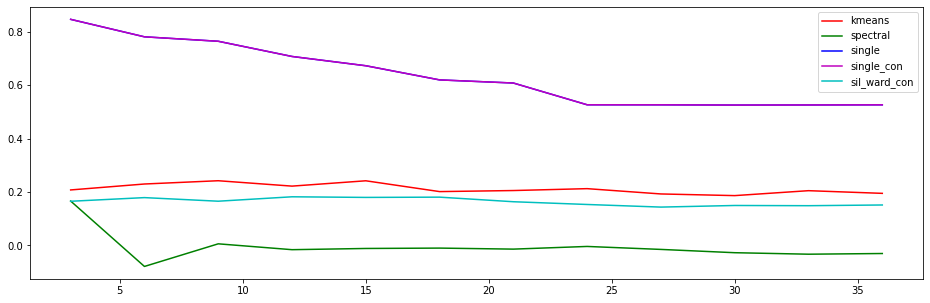

In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_spectral.reshape(-1, 1),'g', label='spectral')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Bé, probablement les nostres dades no encaixen molt bé amb l'agrupació espectral. Hem de visualitzar-los per veure per què probablement...


### 7.5 Comparació de diferents algorismes d'agrupació en conjunts de dades de joguina



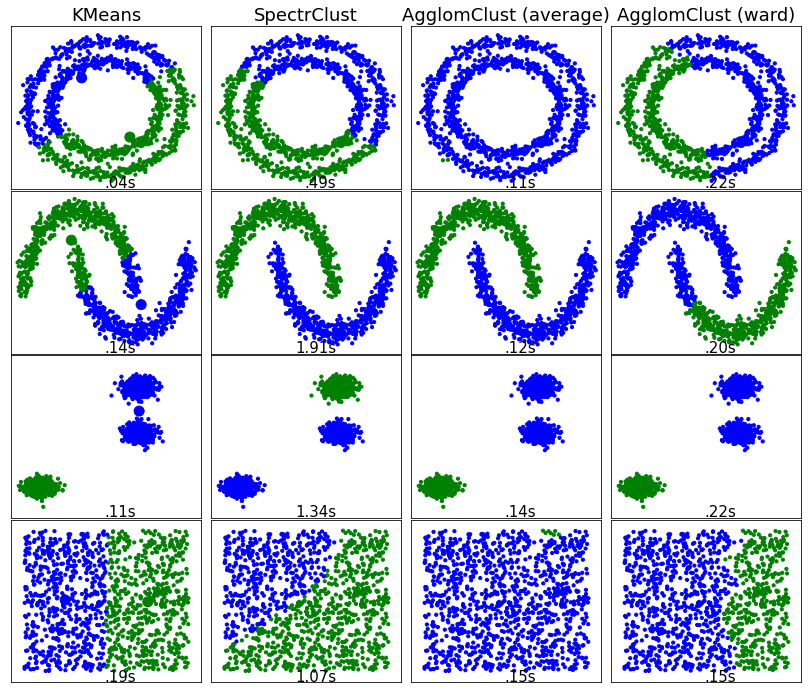

In [ ]:
from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1200
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.7,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.07)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs, no_structure]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=True)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    # connectivity=None

    # Compute distances
    distances = euclidean_distances(X)

    # create clustering estimators
    means_ = cluster.KMeans(n_clusters=2)
    spectral_ = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
                                                  affinity="nearest_neighbors")
    average_linkage_ = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", 
                                                  n_clusters=2, connectivity=connectivity)
    ward_ = cluster.AgglomerativeClustering(n_clusters=2,
                                                  linkage='ward', connectivity=connectivity)

    for name, algorithm in [
                            ('KMeans', means_),
                            ('SpectrClust', spectral_),
                            ('AgglomClust (average)', average_linkage_),
                            ('AgglomClust (ward)', ward_)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            
        #visualize results    
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.66, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

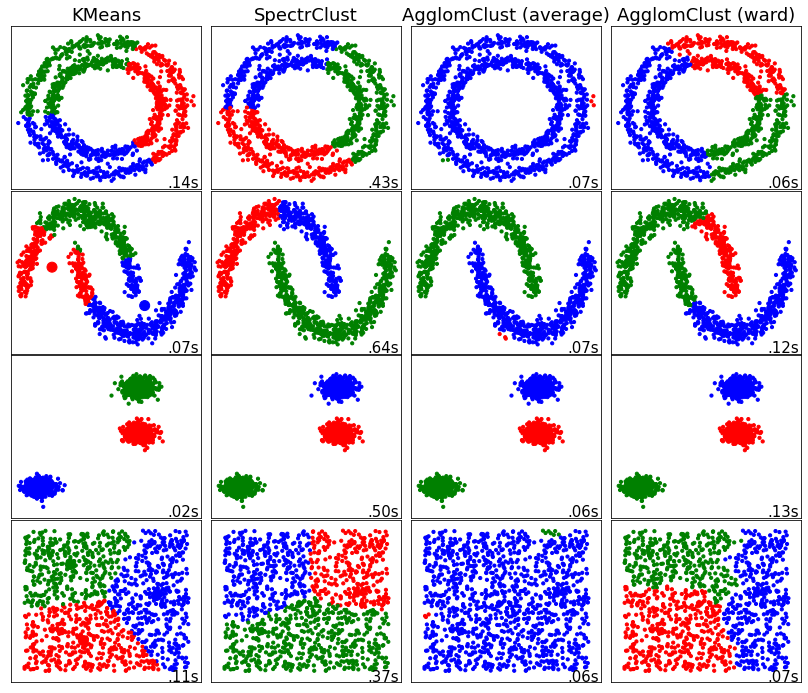

In [ ]:
plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs,
                                     no_structure]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)


    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=True)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Compute distances
    distances = euclidean_distances(X)

    # create clustering estimators
 
    means_ = cluster.KMeans(n_clusters=3)
    spectral_ = cluster.SpectralClustering(n_clusters=3,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    average_linkage_ = cluster.AgglomerativeClustering(linkage="average",
                            affinity="cityblock", n_clusters=3,
                            connectivity=connectivity)
    ward_ = cluster.AgglomerativeClustering(n_clusters=3,
                    linkage='ward', connectivity=connectivity)

    for name, algorithm in [
                            ('KMeans', means_),
                            ('SpectrClust', spectral_),
                            ('AgglomClust (average)', average_linkage_),
                            ('AgglomClust (ward)', ward_)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


## 8 Visualitzem les dades: necessitem PCA

In [ ]:
# Let's consider the PCA transform

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
newdataPCA=pca.fit_transform(datadropnorm) 

In [ ]:
K=15

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(datadropnorm)
y_pred = clf.predict(datadropnorm)

In [ ]:
#visualize the kmeans clusters in the reduced space
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


# To avoid repetition, define ti as a function
def visualize3d(newdataPCA, model):
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10

    ax.plot(newdataPCA[(model.labels_==0), 0], newdataPCA[(model.labels_==0), 1],\
        newdataPCA[(model.labels_==0), 2], 'o', markersize=8, color='blue', alpha=0.5, label='first')

    ax.plot(newdataPCA[(model.labels_==1), 0], newdataPCA[(model.labels_==1), 1],\
        newdataPCA[(model.labels_==1), 2], '^', markersize=8, color='red', alpha=0.5, label='second')

    ax.plot(newdataPCA[(model.labels_==2), 0], newdataPCA[(model.labels_==2), 1],\
        newdataPCA[(model.labels_==2), 2], 'o', markersize=8, color='green', alpha=0.5, label='third')

    ax.plot(newdataPCA[(model.labels_==3), 0], newdataPCA[(model.labels_==3), 1],\
        newdataPCA[(model.labels_==3), 2], 'o', markersize=8, color='yellow', alpha=0.5, label='fourth')

    ax.plot(newdataPCA[(model.labels_==4), 0], newdataPCA[(model.labels_==4), 1],\
        newdataPCA[(model.labels_==4), 2], '*', markersize=8, color='purple', alpha=0.5, label='fifth')

    ax.plot(newdataPCA[(model.labels_==5), 0], newdataPCA[(model.labels_==5), 1],\
        newdataPCA[(model.labels_==5), 2], 'o', markersize=8, color='black', alpha=0.5, label='sext')

    ax.plot(newdataPCA[(model.labels_==6), 0], newdataPCA[(model.labels_==6), 1],\
        newdataPCA[(model.labels_==6), 2], '+', markersize=8, color='red', alpha=0.5, label='seventh')

    ax.plot(newdataPCA[(model.labels_==7), 0], newdataPCA[(model.labels_==7), 1],\
        newdataPCA[(model.labels_==7), 2], 'o', markersize=8, color='cyan', alpha=0.5, label='eight')

    ax.plot(newdataPCA[(model.labels_==8), 0], newdataPCA[(model.labels_==8), 1],\
        newdataPCA[(model.labels_==8), 2], '*', markersize=8, color='magenta', alpha=0.5, label='nine')


    plt.title('Samples from class 0 to class 8 in the PCA space')
    ax.legend(loc='upper right')
    ax.set_xlabel('First PCA base vector')
    ax.set_ylabel('Second PCA base vector')
    ax.set_zlabel('Third PCA base vector')

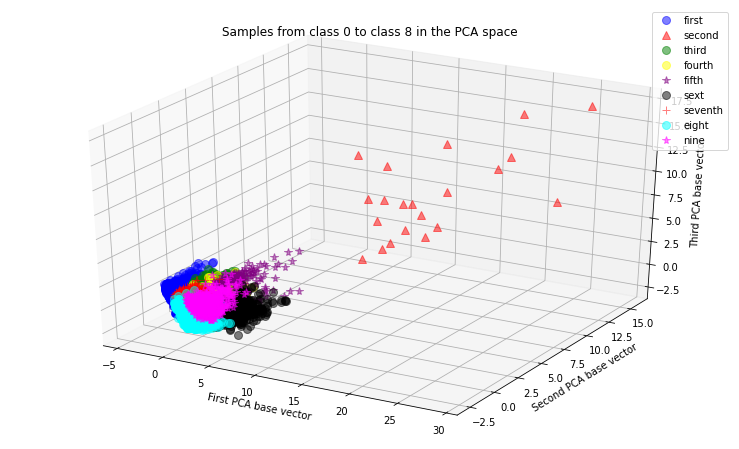

In [ ]:
visualize3d(newdataPCA, clf)

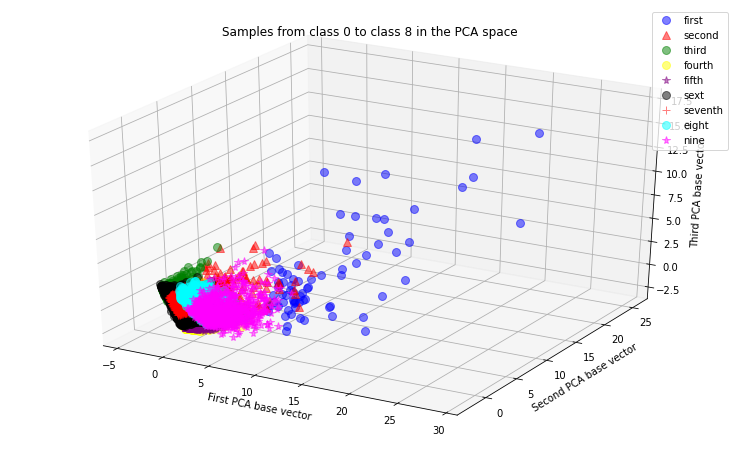

In [ ]:
#Clustering in the reduced space
pca = PCA(n_components=9).fit(datadropnorm)
km=cluster.KMeans(init=pca.components_, n_clusters=9, n_init=1)

km.fit(datadropnorm)
visualize3d(newdataPCA, km)

i amb ward clusters?

In [ ]:
ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=9,connectivity=None)
ward.fit(datadropnorm)
sil_ward_opt=metrics.silhouette_score(datadropnorm, ward.labels_,  metric='euclidean')

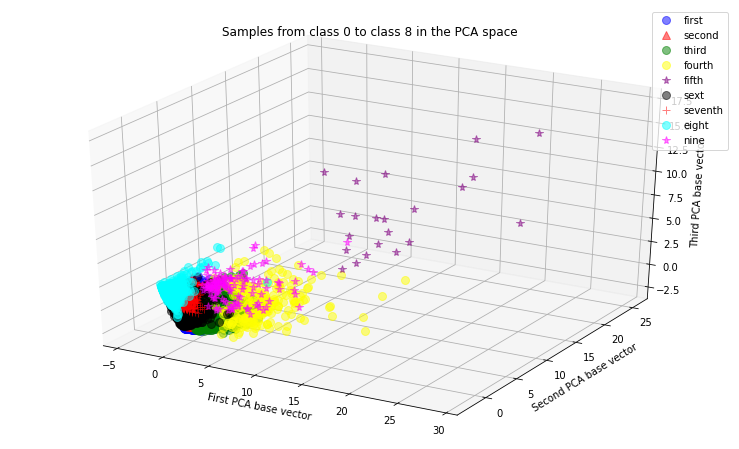

In [ ]:
visualize3d(newdataPCA, ward)

Probablement, en aquest cas, les millors solucions serien entre els kmeans i l'aglomeració aglomerativa de barris.

## 9 Taula resum

A la següent taula adaptada de la documentació de sklearn, podem comprovar diversos mètodes per agrupar en clúster, els seus paràmetres corresponents, escalabilitat, el seu ús i les nocions de similitud que utilitzen, així com el format de dades d'entrada necessari.

<table border="1">
<colgroup>
<col width="12.5%" />
<col width="12.5%" />
<col width="20%" />
<col width="20%" />
<col width="20%" />
<col width="15%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method name</th>
<th class="head">Parameters</th>
<th class="head">Scalability</th>
<th class="head">Use</th>
<th class="head">Metric</th>
<th class="head">Input</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><em>K-Means</em></td>
<td>number of clusters</td>
<td>Very large <cite>n_samples</cite>, medium <cite>n_clusters</cite></td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
<tr class="row-odd"><td><em>Spectral clustering</em></td>
<td>number of clusters</td>
<td>Medium <cite>n_samples</cite>, small <cite>n_clusters</cite></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
<td>Affinity/distance matrix</td>
</tr>
<tr class="row-even"><td><em>Hierarchical clustering</em></td>
<td>number of clusters/ threshold</td>
<td>Large <cite>n_samples</cite> and <cite>n_clusters</cite></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
</tbody>
</table>


## 10 (OPTIONAL) Case Study: Amazon Fine Food Reviews


This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Data are stored in:
     - Reviews.csv: Pulled from the corresponding SQLite table named Reviews as well as 
     - database.sqlite: Contains the table 'Reviews'


### 10.1.1. Introduction:


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454  from Oct 1999 - Oct 2012<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

### 10.1.2 Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. Text
5. Score - rating between 1 and 5
6. ProfileName
7. HelpfulnessNumerator - number of users who found the review helpful
8. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
9. Time - timestamp for the review

### 10.1.3 Goal: Apply clustering techniques to summarize similar opinions on products.
Hint: May be you should explore techniques like Bag of words or Word2Vec to manage textual information.

## 10.2 Case study: Customer segmentation

Analyze the content of an E-commerce database that lists purchases made by $\sim$4000 customers over a period of one year (from 2010/12/01 to 2011/12/09). The dataset is stored in: ecommerce-data.csv.

## Final goal: develop a model that allows to anticipate the purchases that will be made by a new customer, during the following year.

You can address the following tasks: <br>

___
**1. Data Preparation**

**2. Exploring the content of variables**

   - 2.1 Countries
   - 2.2 Customers and products
       * 2.2.1 Cancelling orders
       * 2.2.2 StockCode
       * 2.2.3 Basket price

**3. Insight on product categories**

   - 3.1 Product description 
   - 3.2 Defining product categories 
       * 3.2.1 Data encoding
       * 3.2.2 Clusters of products
       * 3.2.3 Characterizing the content of clusters
   
**4. Customer categories**

   - 4.1 Formating data
       * 4.1.1 Grouping products 
       * 4.1.2 Time spliting of the dataset
       * 4.1.3 Grouping orders 
   - 4.2 Creating customer categories
       * 4.2.1 Data enconding
       * 4.2.2 Creating categories

**5. Classifying customers**

   - 5.1 Support Vector Machine Classifier (SVC)
       * 5.1.1 Confusion matrix
       * 5.1.2 Learning curves 
   - 5.2 Logistic regression 
   - 5.3 k-Nearest Neighbors
   - 5.4 Decision Tree
   - 5.5 Random Forest
   - 5.6 AdaBoost
   - 5.7 Gradient Boosting Classifier
   

## 11 (OPTIONAL) An illustration of Spectral clustering

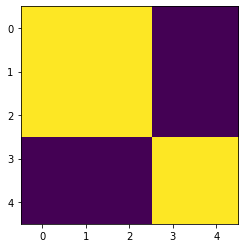

In [ ]:
#Suppose an ideal similarity matrix
import numpy as np

S = np.array([[1,1,1,0,0],[1, 1,1, 0, 0],[1, 1,1, 0, 0],[0,0,0,1,1],[0,0,0,1,1]]) # connectivity matrix
plt.imshow(S,interpolation='nearest')

This matrix shows how data is similar to each other. We can clearly see two clusters. Let us now check the eigenvectors of this matrix.

Eigenvalues: 
 [ 3.00000000e+00  2.00000000e+00  0.00000000e+00  0.00000000e+00 -2.22044605e-16]

Eigenvectors: 
 [[ 0.57735027  0.          0.          0.         -0.81649658]
 [ 0.57735027  0.         -0.70710678  0.          0.40824829]
 [ 0.57735027  0.          0.70710678  0.          0.40824829]
 [ 0.          0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678  0.        ]]


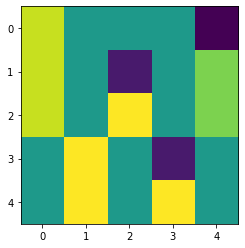

In [ ]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
from scipy.linalg import eig
 
[eig_vals, eig_vecs] = eig(S)
 
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print('Eigenvalues: \n', np.real(eig_vals[sorted_inds]))
print()
print('Eigenvectors: \n', eig_vecs[:,sorted_inds])
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')

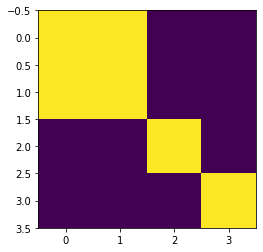

In [ ]:
#Suppose an ideal similarity matrix
import numpy as np
 
S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,0],[0,0,0,1]])
plt.imshow(S,interpolation='nearest')


[2. 1. 1. 0.]

[[ 0.70710678  0.          0.         -0.70710678]
 [ 0.70710678  0.          0.          0.70710678]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]]


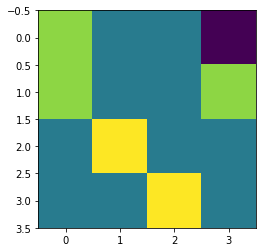

In [ ]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
 
from scipy.linalg import eig
 
[eig_vals, eig_vecs] = eig(S)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print(np.real(eig_vals[sorted_inds]))
print()
print(eig_vecs[:,sorted_inds])
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')


Observe that in the ideal case the first eigenvector characterizes the first cluster and the second one - the second cluster. This observation can be generalized to k-eigenvectors for K clusters. Let us corrupt the matrix a little bit, and see what happens.

In [ ]:
noise=0.2
S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,1],[0,0,1,1]])
S2 = S+noise*np.random.rand(S.shape[0],S.shape[1])*(1-np.eye(4))

plt.imshow(S2,interpolation='nearest')


In [ ]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
[eig_vals, eig_vecs] = eig(S2)

sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print(np.real(eig_vals[sorted_inds]))
 
print ()
 
print(np.real(eig_vecs[:,sorted_inds]))
 
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')


[ 2.26533615e+00  1.85952155e+00 -4.81964655e-04 -1.24375731e-01]

[[ 0.54422454  0.44121096 -0.12941221  0.57007156]
 [ 0.51030479  0.41562938  0.22142856 -0.46572186]
 [ 0.47459589 -0.56230981 -0.6843428  -0.50245354]
 [ 0.46708395 -0.56248803  0.68256634  0.45349972]]


The result is not so nice, but let us look at the first two eigenvectors. Can we observe the clusters?

<div class="alert alert-success"> **EXERCISE:** Increase the value of the random noise and check the two first eigenvalues and eigenvectors. Can we partition the two clusters based on that information? (Recall that the maximum value in a similarity matrix is 1.)
</div>

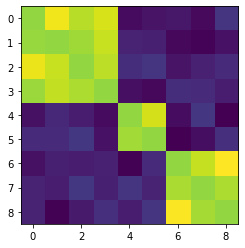

In [ ]:
#Suppose an ideal similarity matrix
import numpy as np
 
S = np.array([[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[0,0,0,0,1,1,0,0,0],
              [0,0,0,0,1,1,0,0,0],[0,0,0,0,0,0,1,1,1],[0,0,0,0,0,0,1,1,1],[0,0,0,0,0,0,1,1,1]])
 
noise=0.2
S2 = S+noise*np.random.rand(S.shape[0],S.shape[1])*(1-np.eye(9))
plt.imshow(S2,interpolation='nearest')
 

In [ ]:
[eig_vals, eig_vecs] = eig(S2)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print('Eigenvalues: \n', np.real(eig_vals[sorted_inds]))
 
print ()
 
print('Eigenvectors: \n', np.real(eig_vecs[:,sorted_inds]))
 
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')

Eigenvalues: 
 [ 4.40578668  3.10995658  2.01202664  0.06765966 -0.05304185 -0.05304185 -0.13278605 -0.1782799  -0.1782799 ]

Eigenvectors: 
 [[-0.47543075 -0.15447269 -0.0734246  -0.23160892  0.12897884  0.12897884  0.04290579  0.14843196
   0.14843196]
 [-0.44740227 -0.17472897 -0.01634124  0.13321101  0.32643293  0.32643293 -0.29386436  0.00900985
   0.00900985]
 [-0.4805512  -0.14495852  0.00277223 -0.206286   -0.62323885 -0.62323885 -0.32264865  0.09114823
   0.09114823]
 [-0.45815958 -0.12793016 -0.08204518  0.29843501  0.13489905  0.13489905  0.55884374 -0.23087387
  -0.23087387]
 [-0.09933961  0.06289563  0.70089753  0.49105261  0.35415175  0.35415175  0.02707608 -0.03659309
  -0.03659309]
 [-0.12004853  0.04921359  0.66687293 -0.4815217  -0.31338401 -0.31338401 -0.01608639  0.05219528
   0.05219528]
 [-0.18658588  0.56310636 -0.16027205 -0.20406049  0.04829373  0.04829373 -0.5755291   0.51733051
   0.51733051]
 [-0.19630038  0.52584931 -0.1020186   0.47703138 -0.14116993 -0.14

#### Setting the number of clusters

Let us look at the eigenvalues in ascending order.

[ 4.40578668+0.j         3.10995658+0.j         2.01202664+0.j         0.06765966+0.j
 -0.05304185+0.057703j  -0.05304185-0.057703j  -0.1782799 +0.0531243j -0.1782799 -0.0531243j
 -0.13278605+0.j       ]


<BarContainer object of 9 artists>

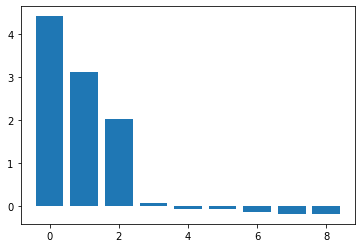

In [ ]:
#Setting the clusters
# plt.bar(range(10), eig_vals.real[sorted_inds[0:10]])
print(eig_vals)
 
plt.bar(range(9), eig_vals.real[sorted_inds])

Observe that there are three which are very different from zero. In particular, a good heuristic for checking how many clusters there are is precisely counting the number of different from zero eigenvalues. In this problem, this value is precisely three clusters.

Note that in this example we applied the eigenvectors decomposition on the connectivity matrix. That's why we look for the jhighest eigenvalues. However if we apply the decomposition on L=W-G, where W is the adjacency matrix and G is the degree diagonal matrix, we look for the smallest eigenvalues.

Handling multiple clusters
What if we have multiple clusters? Actually, for  𝐾  clusters we have to check for the corresponding eigenvectors. The usual way of handling this situation is to use a K-means on the eigenvectors of interest.

In [ ]:
from sklearn.cluster import KMeans

K=3
clf = KMeans(n_clusters=K,init='k-means++')

In [ ]:
print('Eigenvectors:\n', np.real(eig_vecs[:,sorted_inds[0:K]]))
print() 
    
print('Eigenvalues:\n', np.real(eig_vals))

Eigenvectors:
 [[-0.47543075 -0.15447269 -0.0734246 ]
 [-0.44740227 -0.17472897 -0.01634124]
 [-0.4805512  -0.14495852  0.00277223]
 [-0.45815958 -0.12793016 -0.08204518]
 [-0.09933961  0.06289563  0.70089753]
 [-0.12004853  0.04921359  0.66687293]
 [-0.18658588  0.56310636 -0.16027205]
 [-0.19630038  0.52584931 -0.1020186 ]
 [-0.18796012  0.55519796 -0.12462311]]

Eigenvalues:
 [ 4.40578668  3.10995658  2.01202664  0.06765966 -0.05304185 -0.05304185 -0.1782799  -0.1782799  -0.13278605]


In [ ]:
clf.fit(np.real(eig_vecs[:,sorted_inds[0:K]]))
y_pred=clf.predict(np.real(eig_vecs[:,sorted_inds[0:K]]))
print(y_pred)
 

[0 0 0 0 2 2 1 1 1]


The former code is now general for any number of clusters.

In [ ]:
sil_spectral=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        spectral = cluster.SpectralClustering(n_clusters=i*3+3,  affinity="nearest_neighbors",  eigen_solver='arpack')
        spectral.fit(datadropnorm)
        sil_spectral[i]=metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean')
print(sil_spectral)

k: 3
k: 6
k: 9
k: 12
k: 15
k: 18
k: 21
k: 24
k: 27
k: 30
k: 33
k: 36
[ 0.1662958  -0.07837623  0.00625606 -0.01633082 -0.01111536 -0.00928588 -0.00492898 -0.01386514 -0.01855472
 -0.02616631 -0.05758696 -0.03537439]


In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*3+3,sil_ward_noc.reshape(-1, 1),'g', label='ward')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='ward_con')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'', label='ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=105)